<a href="https://colab.research.google.com/github/umbutun/hands-on-machine-learning-practice/blob/main/notebooks/chapter_10_pytorch_nn/chapter_10_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 10 – Building Neural Networks with PyTorch**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

This project requires Python 3.10 or above:

In [1]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

Are we using Colab or Kaggle?

In [3]:
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

If using Colab, a couple libraries are not pre-installed so we must install them manually:

In [4]:
if IS_COLAB:
    %pip install -q optuna torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 24.4 MB/s eta 0:00:00


And of course we need PyTorch, specifically PyTorch ≥ 2.6.0:

In [5]:
import torch

assert Version(torch.__version__) >= Version("2.6.0")

As we did in earlier chapters, let's define the default font sizes to make the figures prettier:

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's  define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [7]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')


IMAGES_PATH = Path("/content/drive/My Drive/Colab Notebooks/hands-on-ml/ch10-images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Mounted at /content/drive


# PyTorch Fundamentals
## PyTorch Tensors

In [8]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [9]:
X.shape

torch.Size([2, 3])

In [10]:
X.dtype

torch.float32

In [11]:
X[0, 1]

tensor(4.)

In [12]:
X[:, 1]

tensor([4., 3.])

In [13]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [14]:
X.exp()

tensor([[   2.7183,   54.5981, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [15]:
X.mean()

tensor(3.8333)

In [16]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [17]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

In [18]:
import numpy as np

X.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [19]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [20]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [21]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [22]:
# extra code: demonstrate torch.from_numpy()
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])
X2 = torch.from_numpy(X2_np)  # X2_np and X2 share the same data in memory
X2_np[0, 1] = 88
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

In [23]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In-Place Operation (easily spot with _ suffix):

In [24]:
X.relu_()
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

Out-Of-Place Operation (no suffix):

In [25]:
Y = X.relu()
Y

tensor([[1., 0., 7.],
        [2., 0., 6.]])

PyTorch tensors really resemble NumPy arrays. In fact, they have over 200 common functions!

In [26]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## Hardware Acceleration

In [27]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'cuda'

In [28]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='cuda', index=0)

In [29]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [30]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [31]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

16.2 ms ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
559 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Autograd

Consider a simple function, $f(x) = x^2$.
Calculus tells us that the derivative of this function is $f'(x)=2x$. Let's evaluate $f(5)$ and the derivative $f'(5)$ using autograd. We expect to find $f(5)=5^2=25$ and $f'(5)=2*5=10$. Let's see!

In [32]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [33]:
f.backward()
x.grad

tensor(10.)

In [34]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [35]:
x

tensor(4., requires_grad=True)

Alternatively, we could have used this code for the gradient descent step (but using `no_grad()` is more common for this):

In [36]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

In [37]:
x.grad.zero_()

tensor(0.)

Let's put everything together to get our training loop:

In [38]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    x.grad.zero_()  # reset the gradients

The variable `x` gets pushed towards 0, since that's the value that minimizes $f(x) = x^2$:

In [39]:
x

tensor(1.0185e-09, requires_grad=True)

# Implementing Linear Regression
## Linear Regression Using Tensors & Autograd

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

Let's say you have a tensor `X` like this, where each row represents a sample and each column represents a feature:

In [41]:
X_example = torch.tensor([[10., 20., 30.],    # Sample 1
                            [1.,  2.,  3.],     # Sample 2
                            [5.,  15., 25.]])  # Sample 3

print("Original tensor X_example:")
print(X_example)
print("Shape of X_example:", X_example.shape)

Original tensor X_example:
tensor([[10., 20., 30.],
        [ 1.,  2.,  3.],
        [ 5., 15., 25.]])
Shape of X_example: torch.Size([3, 3])


When you calculate `X_example.mean(dim=0)`, you are telling PyTorch to compute the average for each column (feature) independently, considering all the rows (samples). This means:

*   **For the first column:** (10 + 1 + 5) / 3 = 16 / 3 = 5.33
*   **For the second column:** (20 + 2 + 15) / 3 = 37 / 3 = 12.33
*   **For the third column:** (30 + 3 + 25) / 3 = 58 / 3 = 19.33

The `keepdims=True` argument ensures that the output tensor retains the original number of dimensions, making it easy to broadcast during operations like `(X_train - means) / stds`. Without `keepdims=True`, the result would be a 1D tensor.

In [42]:
means_example = X_example.mean(dim=0, keepdims=True)

print("Mean across rows (dim=0) with keepdims=True:")
print(means_example)
print("Shape of means_example:", means_example.shape)

Mean across rows (dim=0) with keepdims=True:
tensor([[ 5.3333, 12.3333, 19.3333]])
Shape of means_example: torch.Size([1, 3])


For a 3-dimensional tensor, often represented as `(dim0, dim1, dim2)` or `(batches, rows, columns)` or `(batches, sequence_length, features)`:

*   **`dim=0`**: When you calculate `mean(dim=0)`, you are computing the average across the **first dimension**. If you imagine a stack of 2D matrices, `dim=0` averages values at the same `(row, column)` position across all matrices in the stack.
    *   *Example Interpretation*: If your tensor is `(batch_size, height, width)`, then `mean(dim=0)` will give you a single `(height, width)` tensor where each element is the average of that `(height, width)` position across all samples in the batch.

*   **`dim=1`**: Calculating `mean(dim=1)` means you're averaging across the **second dimension**. For each `(dim0, dim2)` slice, you're averaging the elements along `dim1`.
    *   *Example Interpretation*: If your tensor is `(batch_size, height, width)`, then `mean(dim=1)` will give you a `(batch_size, width)` tensor where each element is the average of that column across all rows for each batch.

*   **`dim=2`**: When you compute `mean(dim=2)`, you're averaging across the **third dimension**. For each `(dim0, dim1)` slice, you're averaging the elements along `dim2`.
    *   *Example Interpretation*: If your tensor is `(batch_size, height, width)`, then `mean(dim=2)` will give you a `(batch_size, height)` tensor where each element is the average of that row across all columns for each batch.

Using `keepdims=True` is just as important here as in the 2D case, as it preserves the number of dimensions, making the output compatible for broadcasting with the original tensor (or other tensors of appropriate shape).

In [43]:
# Let's create a 3D tensor, imagine it as 2 batches of 3x4 matrices
X_3d = torch.arange(24).reshape(2, 3, 4).float()
print("Original 3D tensor X_3d (shape: ", X_3d.shape, ")\n", X_3d)

print("\n--- mean(dim=0) ---")
mean_dim0 = X_3d.mean(dim=0)
print("Mean along dim=0 (averaging across batches) (shape: ", mean_dim0.shape, ")\n", mean_dim0)

print("\n--- mean(dim=1) ---")
mean_dim1 = X_3d.mean(dim=1)
print("Mean along dim=1 (averaging across rows for each batch) (shape: ", mean_dim1.shape, ")\n", mean_dim1)

print("\n--- mean(dim=2) ---")
mean_dim2 = X_3d.mean(dim=2)
print("Mean along dim=2 (averaging across columns for each row and batch) (shape: ", mean_dim2.shape, ")\n", mean_dim2)

print("\n--- mean(dim=0, keepdims=True) ---")
mean_dim0_keepdims = X_3d.mean(dim=0, keepdims=True)
print("Mean along dim=0 with keepdims=True (shape: ", mean_dim0_keepdims.shape, ")\n", mean_dim0_keepdims)

Original 3D tensor X_3d (shape:  torch.Size([2, 3, 4]) )
 tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

--- mean(dim=0) ---
Mean along dim=0 (averaging across batches) (shape:  torch.Size([3, 4]) )
 tensor([[ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.]])

--- mean(dim=1) ---
Mean along dim=1 (averaging across rows for each batch) (shape:  torch.Size([2, 4]) )
 tensor([[ 4.,  5.,  6.,  7.],
        [16., 17., 18., 19.]])

--- mean(dim=2) ---
Mean along dim=2 (averaging across columns for each row and batch) (shape:  torch.Size([2, 3]) )
 tensor([[ 1.5000,  5.5000,  9.5000],
        [13.5000, 17.5000, 21.5000]])

--- mean(dim=0, keepdims=True) ---
Mean along dim=0 with keepdims=True (shape:  torch.Size([1, 3, 4]) )
 tensor([[[ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.],
         [14., 15., 16., 17.]]])


The next cell prepares your `X_train`, `X_valid`, and `X_test` datasets for use with PyTorch by converting them into `torch.FloatTensor` tensors. This is necessary because PyTorch operations work directly with its own tensor type.

After conversion, the code performs **standardization** (also known as Z-score normalization) on the features. This is a common preprocessing step in machine learning to scale numerical features so they have a mean of 0 and a standard deviation of 1. Standardization helps gradient-based optimization algorithms converge faster and can improve model performance. Here's how it works:

1.  **`X_train = torch.FloatTensor(X_train)`**:
    *   Converts the NumPy array `X_train` into a PyTorch `FloatTensor`. This is done for `X_valid` and `X_test` as well.

2.  **`means = X_train.mean(dim=0, keepdims=True)`**:
    *   Calculates the mean of each feature (column) in the `X_train` dataset. `dim=0` means the mean is computed across rows, and `keepdims=True` ensures the resulting `means` tensor retains its dimensionality, making it easy to broadcast during subtraction.

3.  **`stds = X_train.std(dim=0, keepdims=True)`**:
    *   Calculates the standard deviation of each feature in `X_train`, similar to how `means` were calculated.

4.  **`X_train = (X_train - means) / stds`**:
    *   Applies the standardization formula: `(value - mean) / standard_deviation`. Each feature in `X_train` is transformed using the calculated `means` and `stds` from the training data. It's crucial to use the means and standard deviations *from the training set* to transform the validation and test sets to prevent data leakage.

In [44]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

PyTorch expects the targets to have one row per sample, so let's reshape the targets to be column vectors:

In [45]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

This code cell initializes the parameters for a simple linear regression model that will be trained using PyTorch. Let's go through each line:

*   **`torch.manual_seed(42)`**:
    *   This line sets the random seed for PyTorch operations. Setting a manual seed ensures that any random operations (like initializing tensors with random values) will produce the same results every time you run the code. This is crucial for reproducibility, allowing you to get the same experimental outcomes across different runs.

*   **`n_features = X_train.shape[1]`**:
    *   This determines the number of input features in your training data. `X_train.shape` returns a tuple representing the dimensions of the `X_train` tensor. Since `X_train` is typically `(number_of_samples, number_of_features)`, `X_train.shape[1]` extracts the number of features (columns).

*   **`w = torch.randn((n_features, 1), requires_grad=True)`**:
    *   This initializes the **weight vector (`w`)** for the linear regression model. `torch.randn` creates a tensor filled with random numbers drawn from a standard normal distribution (mean 0, variance 1).
    *   The shape `(n_features, 1)` means it's a column vector, with one weight for each input feature.
    *   `requires_grad=True` is a critical PyTorch setting. It tells PyTorch to track all operations performed on this tensor so that gradients can be computed during the backward pass (backpropagation). This is essential for optimization algorithms like gradient descent to update the weights.

*   **`b = torch.tensor(0., requires_grad=True)`**:
    *   This initializes the **bias term (`b`)** for the linear regression model. It's set to a single floating-point value of `0.0`.
    *   Similar to `w`, `requires_grad=True` is set to ensure that PyTorch tracks operations on `b` so its gradient can also be computed and updated during training.

In [46]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

**Note**: in the next section, we will build an almost identical model using PyTorch's high-level API. Its results will be slightly different because it will use a different parameter initialization method: it will use a uniform random distribution from $-\frac{1}{2\sqrt 2}$ to $+\frac{1}{2\sqrt 2}$ to initialize both the weights and the bias term. If you want to get exactly the same result here as in the next section, you can uncomment and run the initialization code in the following cell, instead of the code in the previous cell:

In [47]:
# torch.manual_seed(42)
# n_features = X_train.shape[1]  # there are 8 input features
# r = 2 ** -1.5  # this is equal to 1 / 2√2
# w = torch.empty(n_features, 1).uniform_(-r, r)
# b = torch.empty(1).uniform_(-r, r)
# w.requires_grad_(True)
# b.requires_grad_(True)

This code cell implements a basic training loop for the linear regression model you just initialized. It uses **batch gradient descent** to iteratively adjust the model's weights (`w`) and bias (`b`) to minimize the prediction error. Let's break down each step:

*   **`learning_rate = 0.4`**:
    *   This sets the `learning_rate` for the optimization algorithm. The learning rate is a hyperparameter that determines the size of the steps taken during gradient descent. A larger learning rate can converge faster but might overshoot the minimum, while a smaller one can be more precise but slower.

*   **`n_epochs = 20`**:
    *   This defines the number of `epochs`, which is the number of times the entire training dataset will be passed forward and backward through the neural network.

*   **`for epoch in range(n_epochs):`**:
    *   This loop iterates through each epoch of the training process.

*   **`y_pred = X_train @ w + b`**:
    *   This is the **forward pass**. It calculates the predicted `y` values (`y_pred`) using the current `X_train` data, the weight vector `w`, and the bias `b`. This is the linear regression equation: `y = Xw + b`.

*   **`loss = ((y_pred - y_train) ** 2).mean()`**:
    *   This calculates the **Mean Squared Error (MSE)**, which is a common loss function for regression tasks. It measures the average squared difference between the predicted values (`y_pred`) and the actual target values (`y_train`). The goal of training is to minimize this loss.

*   **`loss.backward()`**:
    *   This is the **backward pass**. It triggers PyTorch's autograd engine to compute the gradients of the `loss` with respect to all tensors that have `requires_grad=True` (in this case, `w` and `b`). These gradients indicate how much each parameter contributes to the error.

*   **`with torch.no_grad():`**:
    *   This context manager temporarily disables gradient tracking. This is crucial during the parameter update step because you don't want these updates to be considered part of the computational graph for subsequent gradient calculations. The optimizer's step should not have its own gradients calculated.

*   **`b -= learning_rate * b.grad`** **`w -= learning_rate * w.grad`**: These lines perform the **gradient descent step**. The parameters (`w` and `b`) are updated by subtracting a fraction of their respective gradients. The `learning_rate` controls the size of this step, moving the parameters in the direction that reduces the loss.

*   **`b.grad.zero_()`** **`w.grad.zero_()`**:
    These lines **reset the gradients to zero**. After each optimization step, the gradients must be explicitly zeroed out. If not, the gradients from previous backward passes would accumulate, leading to incorrect updates in subsequent epochs.

*   **`print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")`**:
    *   This line prints the current epoch number and the loss value, allowing you to monitor the training progress. `loss.item()` retrieves the scalar value of the loss tensor.

In [48]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158456802368164
Epoch 2/20, Loss: 4.8793745040893555
Epoch 3/20, Loss: 2.255225419998169
Epoch 4/20, Loss: 1.3307634592056274
Epoch 5/20, Loss: 0.9680691957473755
Epoch 6/20, Loss: 0.8142675757408142
Epoch 7/20, Loss: 0.7417045831680298
Epoch 8/20, Loss: 0.7020701169967651
Epoch 9/20, Loss: 0.6765918731689453
Epoch 10/20, Loss: 0.6577965021133423
Epoch 11/20, Loss: 0.6426151990890503
Epoch 12/20, Loss: 0.6297222971916199
Epoch 13/20, Loss: 0.6184942126274109
Epoch 14/20, Loss: 0.6085968613624573
Epoch 15/20, Loss: 0.5998216867446899
Epoch 16/20, Loss: 0.592018723487854
Epoch 17/20, Loss: 0.5850691795349121
Epoch 18/20, Loss: 0.578873336315155
Epoch 19/20, Loss: 0.573345422744751
Epoch 20/20, Loss: 0.5684100389480591


In [49]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [50]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

## Linear Regression Using PyTorch's High-Level API

In [51]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

Since our model has a single neuron (out_features=1), the bias vector contains a single bias term, and a weight matrix contains a single row.

In [52]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [53]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [54]:
model.weight.shape

torch.Size([1, 8])

In [55]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [56]:
for param in model.named_parameters():
    print(param)

('weight', Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True))
('bias', Parameter containing:
tensor([0.3117], requires_grad=True))


The line `model(X_train[:2])` is essentially calling the `forward()` method of your `model` instance. When you define a `nn.Module` in PyTorch, making an instance of it callable like `model(...)` automatically triggers its `forward()` method.

In this specific case:

*   `model`: This refers to your instantiated PyTorch model (which, based on the preceding cells, is likely the `nn.Linear` model for linear regression).
*   `X_train[:2]`: This selects the first two samples (rows) from your `X_train` tensor. This is a common practice to quickly test the model's output shape and initial behavior without processing the entire dataset.

So, `model(X_train[:2])` takes these two training samples as input, passes them through the model's layers (in this case, just a linear transformation), and returns the model's predictions (or intermediate activations, depending on the model's definition) for those two samples.

In [57]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [58]:
def dummy_hook_fn(module, input, output):
    print("Forward hook activated!")
    # You can inspect input/output here

# Instantiate a fresh model to avoid any state issues from previous reassignments
# using n_features from earlier to keep it compatible with our data
model_for_hook_demo = nn.Linear(in_features=n_features, out_features=1).to(device)

hook_handle = model_for_hook_demo.register_forward_hook(dummy_hook_fn)

# Now, let's call the model once to see the hook activate
# Use a small slice of X_train, ensuring it's on the correct device
model_for_hook_demo(X_train[:1].to(device)) # Pass data to activate the hook

Forward hook activated!


tensor([[-0.8178]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [59]:
# To remove the hook, simply call its .remove() method
hook_handle.remove()
print("Hook removed. Calling model again should not activate the hook.")

# Use the same model_for_hook_demo for consistency
model_for_hook_demo(X_train[:1].to(device))

Hook removed. Calling model again should not activate the hook.


tensor([[-0.8178]], device='cuda:0', grad_fn=<AddmmBackward0>)

This code cell initializes two fundamental components required for training a PyTorch model:

1.  **`optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)`**:
    *   **`torch.optim.SGD`**: This creates an optimizer object using the Stochastic Gradient Descent (SGD) algorithm. Optimizers are responsible for updating the model's weights and biases during training based on the calculated gradients.
    *   **`model.parameters()`**: This tells the optimizer *which* parameters (weights and biases) of your `model` it should optimize. This method automatically collects all tensors in the model that have `requires_grad=True`.
    *   **`lr=learning_rate`**: This sets the `learning_rate` for the optimizer. The learning rate is a crucial hyperparameter that determines the step size at each iteration while moving towards a minimum of the loss function.

2.  **`mse = nn.MSELoss()`**:
    *   **`nn.MSELoss()`**: This initializes the Mean Squared Error (MSE) loss function. Loss functions quantify how far off your model's predictions are from the true target values. During training, the optimizer aims to minimize this loss value.

In [60]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

This code cell defines the `train_bgd` function, which orchestrates the training process of a PyTorch model using **Batch Gradient Descent**.

*   **`def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):`**:
    *   This line defines the function signature, taking the `model`, `optimizer`, `criterion` (loss function), training data (`X_train`, `y_train`), and number of epochs (`n_epochs`) as inputs.

*   **`for epoch in range(n_epochs):`**:
    *   This outer loop iterates through the specified number of `n_epochs`. Each epoch represents one full pass over the entire training dataset.

*   **`y_pred = model(X_train)`**:
    *   **Forward Pass**: The entire `X_train` dataset is passed through the `model` to get predictions (`y_pred`). Since `X_train` contains all training samples, this is a batch gradient descent step.

*   **`loss = criterion(y_pred, y_train)`**:
    *   **Loss Calculation**: The `criterion` (e.g., `nn.MSELoss` in regression) is used to compute the difference between the model's predictions (`y_pred`) and the actual target values (`y_train`).

*   **`loss.backward()`**:
    *   **Backward Pass**: This is where PyTorch's autograd engine kicks in. It computes the gradients of the `loss` with respect to all parameters in the `model` that have `requires_grad=True`.

*   **`optimizer.step()`**:
    *   **Parameter Update**: The `optimizer` (e.g., `torch.optim.SGD`) uses the calculated gradients to update the model's parameters (weights and biases) in the direction that minimizes the `loss`.

*   **`optimizer.zero_grad()`**:
    *   **Zero Gradients**: After updating the parameters, the gradients are reset to zero. This is crucial because PyTorch accumulates gradients by default. If you don't zero them out, the gradients from previous batches/epochs would interfere with the current one, leading to incorrect updates.

*   **`print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")`**:
    *   This line prints the current epoch number and the corresponding loss value, allowing you to monitor the training progress.

In [61]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [62]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.7802939414978027
Epoch 3/20, Loss: 0.6253842115402222
Epoch 4/20, Loss: 0.6060433983802795
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.587356686592102
Epoch 7/20, Loss: 0.5802990794181824
Epoch 8/20, Loss: 0.5741382837295532
Epoch 9/20, Loss: 0.5687101483345032
Epoch 10/20, Loss: 0.5639079809188843
Epoch 11/20, Loss: 0.5596511363983154
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525194406509399
Epoch 14/20, Loss: 0.5495392084121704
Epoch 15/20, Loss: 0.5468900203704834
Epoch 16/20, Loss: 0.544533908367157
Epoch 17/20, Loss: 0.5424376726150513
Epoch 18/20, Loss: 0.5405716300010681
Epoch 19/20, Loss: 0.5389097332954407
Epoch 20/20, Loss: 0.5374288558959961


This code block shows how to use your trained PyTorch model to make predictions on new, unseen data, which is often referred to as **inference** or **prediction time**. It also introduces `torch.no_grad()`, a crucial context manager for this phase.

*   **`X_new = X_test[:3]`**:
    *   This line simply creates a small subset of your `X_test` data, taking the first three samples. This `X_new` tensor represents the "new instances" on which you want your trained model to make predictions.

*   **`with torch.no_grad():`**:
    *   This is a context manager provided by PyTorch that temporarily sets all of PyTorch's `requires_grad` flags to `False` within its block. This means that, for any computations performed inside this block:
        *   **No gradients will be computed or stored.** PyTorch's autograd engine will not build a computation graph to track operations.
        *   **Why is this important for predictions?** During inference, you are not trying to learn or update the model's parameters. Therefore, there's no need to compute gradients. Disabling gradient computation offers several benefits:
            *   **Reduced Memory Usage**: Not storing intermediate activations and gradient information significantly reduces memory consumption.
            *   **Faster Computation**: Operations are faster because PyTorch doesn't need to perform the overhead of building the computation graph.
            *   **Prevents Accidental Updates**: It ensures that no model parameters are accidentally modified if an operation within the block were to somehow trigger gradient calculations.

*   **`y_pred = model(X_new)`**:
    *   Inside the `torch.no_grad()` block, this line performs the forward pass: the `X_new` data is passed through the `model` to obtain its predictions (`y_pred`). Since the model was trained for regression, `y_pred` will contain the predicted continuous values for each of the `X_new` instances.

In [63]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

# Implementing a Regression MLP

In [64]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [65]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523123741149902
Epoch 3/20, Loss: 1.0039883852005005
Epoch 4/20, Loss: 0.8570139408111572
Epoch 5/20, Loss: 0.7740675210952759
Epoch 6/20, Loss: 0.7225847244262695
Epoch 7/20, Loss: 0.6893726587295532
Epoch 8/20, Loss: 0.6669032573699951
Epoch 9/20, Loss: 0.6507738828659058
Epoch 10/20, Loss: 0.6383934020996094
Epoch 11/20, Loss: 0.6281993389129639
Epoch 12/20, Loss: 0.6193399429321289
Epoch 13/20, Loss: 0.6113173365592957
Epoch 14/20, Loss: 0.6038705706596375
Epoch 15/20, Loss: 0.5968307852745056
Epoch 16/20, Loss: 0.5901119112968445
Epoch 17/20, Loss: 0.5836468935012817
Epoch 18/20, Loss: 0.5774063467979431
Epoch 19/20, Loss: 0.5713554620742798
Epoch 20/20, Loss: 0.565444827079773


# Implementing Mini-Batch Gradient Descent using DataLoaders

This code cell leverages PyTorch's data utilities to prepare your training data for efficient processing, for mini-batch gradient descent:

*   **`from torch.utils.data import TensorDataset, DataLoader`**:
    *   This line imports two key classes from PyTorch's `data` utility module:
        *   **`TensorDataset`**: A `Dataset` wrapper that takes multiple tensors (like your `X_train` and `y_train`) and combines them. It ensures that when you query for an item (e.g., `train_dataset[0]`), it returns the corresponding slice from each tensor. It's useful for datasets where all features and labels can be stored in memory as PyTorch tensors.
        *   **`DataLoader`**: This class is an iterator that provides efficient access to your dataset. It handles aspects like batching, shuffling, and multi-process data loading, making training much smoother and faster.

*   **`train_dataset = TensorDataset(X_train, y_train)`**:
    *   Here, your `X_train` (input features) and `y_train` (target labels) tensors are wrapped into a `TensorDataset` object. This dataset will now yield pairs of `(features, label)` when iterated over.

*   **`train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)`**:
    *   This creates a `DataLoader` instance from your `train_dataset`.
        *   **`batch_size=32`**: Specifies that the `DataLoader` should yield data in batches of 32 samples. This is a common practice for mini-batch gradient descent.
        *   **`shuffle=True`**: Instructs the `DataLoader` to randomly shuffle the data at the beginning of each epoch. Shuffling is essential to prevent the model from learning patterns based on the order of samples and helps improve generalization.

In [66]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

This code cell re-initializes and configures the neural network model, along with its optimizer and loss function. It's often done when you want to train a new architecture or restart training with different settings.

*   **`model = nn.Sequential(...)`**:
    *   This line defines a new neural network using `nn.Sequential`. `nn.Sequential` is a convenient way to build models by stacking layers sequentially. The model defined here is a Multi-Layer Perceptron (MLP) for regression:
        *   `nn.Linear(n_features, 50)`: The input layer, mapping `n_features` to 50 neurons.
        *   `nn.ReLU()`: A ReLU activation function after the first linear layer.
        *   `nn.Linear(50, 40)`: A hidden layer, mapping 50 to 40 neurons.
        *   `nn.ReLU()`: Another ReLU activation.
        *   `nn.Linear(40, 1)`: The output layer, mapping 40 neurons to a single output (suitable for regression).

*   **`model = model.to(device)`**:
    *   This is a crucial step that moves the entire model (all its parameters and buffers) from the CPU to the specified `device` (which is typically a GPU like 'cuda' if available). This enables faster computations by leveraging GPU acceleration.

*   **`learning_rate = 0.02`**:
    *   The learning rate for the optimizer is set to `0.02`. Notice this is different from previous examples, indicating a hyperparameter change.

*   **`optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)`**:
    *   A new Stochastic Gradient Descent (SGD) optimizer is initialized. It's configured to optimize the parameters of the *newly defined* `model`.
    *   `momentum=0`: The momentum term is set to 0, meaning standard SGD is used without any momentum accumulation.

*   **`mse = nn.MSELoss()`**:
    *   The Mean Squared Error (MSE) loss function is re-initialized, which will be used to calculate the difference between the model's predictions and the true target values.

In [67]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

This code cell defines the `train` function, which is an enhanced version of the training loop designed for **mini-batch gradient descent**. It processes data in smaller batches, which is generally more efficient and allows for training on larger datasets that might not fit entirely into memory. Let's break down its components:

*   **`def train(model, optimizer, criterion, train_loader, n_epochs):`**: This defines the function signature, taking the `model`, `optimizer`, `criterion` (loss function), `train_loader` (for iterating over mini-batches), and `n_epochs` as inputs.

*   **`model.train()`**: This sets the model to training mode. It's crucial because certain layers, like `Dropout` and `BatchNorm`, behave differently during training (e.g., `Dropout` layers are active, and `BatchNorm` layers update their running statistics).

*   **`for epoch in range(n_epochs):`**: This outer loop iterates through the specified number of `n_epochs`, making multiple passes over the entire training dataset.

*   **`total_loss = 0.`**: Initializes a variable to accumulate the loss for the current epoch.

*   **`for X_batch, y_batch in train_loader:`**: This inner loop iterates through the `train_loader`, which yields mini-batches of data (`X_batch`, `y_batch`). This is the core of mini-batch gradient descent.

*   **`X_batch, y_batch = X_batch.to(device), y_batch.to(device)`**: Crucially, this line moves the current mini-batch of features (`X_batch`) and labels (`y_batch`) to the specified computing `device` (e.g., GPU). This ensures that computations happen on the correct hardware.

*   **`y_pred = model(X_batch)`**:
    *   **Forward Pass**: The model takes the `X_batch` as input and produces predictions (`y_pred`).

*   **`loss = criterion(y_pred, y_batch)`**:
    *   **Loss Calculation**: The `criterion` (loss function, e.g., `nn.MSELoss`) calculates the difference between the model's predictions and the true labels for the current mini-batch.

*   **`total_loss += loss.item()`**: Adds the loss of the current mini-batch to the `total_loss` for the epoch.

*   **`loss.backward()`**:
    *   **Backward Pass**: Computes the gradients of the `loss` with respect to all trainable parameters in the `model`.

*   **`optimizer.step()`**:
    *   **Parameter Update**: The `optimizer` uses these computed gradients to update the model's parameters.

*   **`optimizer.zero_grad()`**:
    *   **Zero Gradients**: Resets the gradients to zero. This is vital because PyTorch accumulates gradients by default; failing to zero them out would lead to gradients from previous mini-batches affecting the current update.

*   **`mean_loss = total_loss / len(train_loader)`**: After iterating through all mini-batches, the average loss for the epoch is calculated.

*   **`print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")`**: Prints the current epoch number and the average loss for that epoch, allowing you to monitor the training progress.

In [68]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [69]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


# Model Evaluation

This code cell defines the `evaluate` function, which is responsible for assessing the performance of a trained PyTorch model on a given dataset, such as a validation or test set. It's designed for **inference** rather than training.

*   **`def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):`**:
    *   This defines the function signature. It takes the `model` to be evaluated, a `data_loader` (which could be `valid_loader` or `test_loader`), a `metric_fn` (a function to calculate a metric, like MSE or RMSE, for each batch), and an optional `aggregate_fn` (defaults to `torch.mean` to combine batch metrics).

*   **`model.eval()`**:
    *   This is a crucial step that sets the model to evaluation mode. In contrast to `model.train()`, this disables specific layers like `Dropout` and ensures that `BatchNorm` layers use their learned running statistics instead of batch statistics. This is essential for consistent and accurate evaluation results.

*   **`metrics = []`**:
    *   Initializes an empty list to store the metric calculated for each mini-batch.

*   **`with torch.no_grad():`**:
    *   As we discussed earlier, this context manager disables gradient calculation. During evaluation, we don't need to compute gradients because we're not updating the model's weights. Disabling autograd saves memory and speeds up computations.

*   **`for X_batch, y_batch in data_loader:`**:
    *   This loop iterates through the provided `data_loader`, yielding mini-batches of features (`X_batch`) and labels (`y_batch`).

*   **`X_batch, y_batch = X_batch.to(device), y_batch.to(device)`**:
    *   Moves the current mini-batch to the specified computing `device` (e.g., GPU), ensuring consistency with the model's device.

*   **`y_pred = model(X_batch)`**:
    *   **Forward Pass**: The model takes the `X_batch` as input and generates predictions (`y_pred`).

*   **`metric = metric_fn(y_pred, y_batch)`**:
    *   The `metric_fn` is applied to the model's predictions (`y_pred`) and the true labels (`y_batch`) to compute the desired performance metric for the current batch.

*   **`metrics.append(metric)`**:
    *   The calculated metric for the current batch is added to the `metrics` list.

*   **`return aggregate_fn(torch.stack(metrics))`**:
    *   After processing all batches, `torch.stack(metrics)` combines all individual batch metrics into a single tensor. Then, the `aggregate_fn` (by default, `torch.mean`) is applied to this tensor to compute the overall metric (e.g., average MSE or RMSE) across the entire dataset. This final value represents the model's performance.

In [70]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

This code block demonstrates how to set up the validation data and then use the previously defined `evaluate` function to assess the model's performance on it.

*   **`valid_dataset = TensorDataset(X_valid, y_valid)`**:
    *   Similar to how `train_dataset` was created, this line wraps your validation features (`X_valid`) and validation labels (`y_valid`) into a `TensorDataset`. This prepares the data to be easily batched and loaded for evaluation.

*   **`valid_loader = DataLoader(valid_dataset, batch_size=32)`**:
    *   A `DataLoader` is created for the validation dataset. This `DataLoader` will yield mini-batches of 32 samples from `valid_dataset` during evaluation.
    *   Note that `shuffle=True` is typically *not* used for validation or test data loaders, as the order of evaluation does not affect the results and shuffling adds unnecessary overhead.

*   **`valid_mse = evaluate(model, valid_loader, mse)`**:
    *   This line calls the `evaluate` function. It passes:
        *   The trained `model`.
        *   The `valid_loader` to provide batches of validation data.
        *   The `mse` (Mean Squared Error) loss function as the `metric_fn` to compute the error.
    *   The result, which is the mean MSE across all validation batches, is stored in the `valid_mse` variable.

In [71]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4080, device='cuda:0')

This code block defines a custom function for calculating **Root Mean Squared Error (RMSE)** and then uses it to evaluate the model on the validation set.

*   **`def rmse(y_pred, y_true):`**:
    *   This defines a new function called `rmse` that takes two arguments: `y_pred` (the model's predictions) and `y_true` (the actual target values).

*   **`evaluate(model, valid_loader, rmse)`**:
    *   This line calls the `evaluate` function (which we discussed earlier). Instead of passing `mse` as the `metric_fn`, it now passes our newly defined `rmse` function. The `evaluate` function will then use this `rmse` function to calculate the RMSE for each batch in the `valid_loader` and return the aggregated (mean) RMSE for the entire validation set.

This demonstrates how you can easily define and use custom metrics with your `evaluate` function to get different perspectives on your model's performance.

In [72]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5668, device='cuda:0')

In [73]:
valid_mse.sqrt()

tensor(0.6388, device='cuda:0')

The difference you observe between `valid_mse.sqrt()` and `evaluate(model, valid_loader, rmse)` stems from the order of operations when aggregating metrics across batches:

1.  **`valid_mse` and `valid_mse.sqrt()`**:
    *   Recall that `valid_mse = evaluate(model, valid_loader, mse)`. Our `evaluate` function, when given `mse` as the `metric_fn`, calculates the Mean Squared Error for *each batch*, then computes the **mean of these batch MSEs** (`aggregate_fn=torch.mean`). So, `valid_mse` is essentially `Mean(Batch_MSE_1, Batch_MSE_2, ..., Batch_MSE_N)`.
    *   When you then call `valid_mse.sqrt()`, you are taking the square root of this **overall average MSE**.

2.  **`evaluate(model, valid_loader, rmse)`**:
    *   In contrast, when you pass our custom `rmse` function as the `metric_fn` to `evaluate`, the `evaluate` function calculates the **Root Mean Squared Error for *each batch***. So, it computes `Batch_RMSE_1, Batch_RMSE_2, ..., Batch_RMSE_N`.
    *   Then, it computes the **mean of these batch RMSEs** (`Mean(Batch_RMSE_1, Batch_RMSE_2, ..., Batch_RMSE_N)`).

**Why are they different?**

Mathematically, the square root of an average is generally not equal to the average of square roots. That is:

$\sqrt{\text{Mean}(\text{Squared Errors})}$ &ne; $\text{Mean}(\sqrt{\text{Squared Errors}})$

 Both are valid ways to aggregate, but they measure slightly different things. `valid_mse.sqrt()` (or just taking the RMSE on the entire dataset without batching) gives you a single RMSE value that represents the overall error. Calculating the mean of batch RMSEs (`evaluate(model, valid_loader, rmse)`) is an average of individual batch performances.

In [74]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6388, device='cuda:0')

This code cell defines the `evaluate_tm` function, which is designed to evaluate a PyTorch model using metrics from the `torchmetrics` library. `torchmetrics` provides a convenient and efficient way to calculate metrics, especially when dealing with data that comes in batches.

*   **`import torchmetrics`**:
    *   Imports the `torchmetrics` library, which offers a wide range of optimized metric implementations.

*   **`def evaluate_tm(model, data_loader, metric):`**:
    *   This function takes the `model` to evaluate, a `data_loader` (like `valid_loader` or `test_loader`), and a `metric` object (an instance of a `torchmetrics.Metric` class, such as `torchmetrics.MeanSquaredError`).

*   **`model.eval()`**:
    *   As with the previous `evaluate` function, this sets the model to evaluation mode, which is important for layers like `Dropout` and `BatchNorm` to behave correctly during inference.

*   **`metric.reset()`**:
    *   This is a crucial step specific to `torchmetrics`. Before starting a new evaluation run, `metric.reset()` clears any internal state or accumulated values from previous computations. This ensures that the metric calculation starts fresh for the current evaluation.

*   **`with torch.no_grad():`**:
    *   This context manager disables gradient calculation, just as before. It's essential for evaluation to save memory and speed up computations, as we are not updating model weights.

*   **`for X_batch, y_batch in data_loader:`**:
    *   The function iterates through mini-batches provided by the `data_loader`.

*   **`X_batch, y_batch = X_batch.to(device), y_batch.to(device)`**:
    *   Moves the current batch of data to the specified `device` (e.g., GPU).

*   **`y_pred = model(X_batch)`**:
    *   The model performs a forward pass to get predictions for the current batch.

*   **`metric.update(y_pred, y_batch)`**:
    *   Instead of manually computing the metric for each batch and appending it to a list, `torchmetrics` allows you to `update` the metric object with predictions and true labels from each batch. The `metric` object intelligently accumulates the necessary information (e.g., sums of squared errors, counts) across all batches.

*   **`return metric.compute()`**:
    *   After all batches have been processed and the `metric` object has accumulated data from the entire `data_loader`, `metric.compute()` calculates the final aggregated metric value (e.g., the overall RMSE or MSE) for the entire dataset. This is a more memory-efficient and often faster way to calculate metrics compared to storing all individual batch metrics.

In [75]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [76]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388, device='cuda:0')

This code cell defines the `train2` function, which is an advanced training loop that not only tracks the training loss but also monitors a specified metric (like RMSE) for both the training and validation sets throughout the training process. It also sets up a new model and visualizes the learning curves.

### Explanation of the `train2` Function:

*   **`def train2(model, optimizer, criterion, metric, train_loader, valid_loader, n_epochs):`**:
    *   This function signature is similar to `train`, but it now explicitly takes a `metric` object (a `torchmetrics` instance) and a `valid_loader`.

*   **`history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}`**:
    *   A dictionary is initialized to store the loss and metric values for each epoch, for both training and validation. This is crucial for plotting learning curves later.

*   **Outer `for epoch in range(n_epochs):` loop**: Iterates through each epoch of training.

*   **`total_loss = 0.`** and **`metric.reset()`**: `total_loss` is reset for the current epoch. The `torchmetrics` `metric` is also reset to clear any accumulated state from previous epochs, ensuring accurate calculation for the current epoch.

*   **Inner `for X_batch, y_batch in train_loader:` loop**:
    *   This loop processes data in mini-batches, just like in the `train` function.
    *   **`model.train()`**: Sets the model to training mode.
    *   **Device transfer, forward pass, loss calculation, backward pass, optimizer step, zero gradients**: These steps are identical to the `train` function.
    *   **`metric.update(y_pred, y_batch)`**: This is where `torchmetrics` comes in for the training metric. Instead of manually accumulating values, the `metric` object is updated with the predictions and true labels of the current batch.

*   **After the inner loop (end of epoch calculations)**:
    *   **`mean_loss = total_loss / len(train_loader)`**: Calculates the average loss for the training set in the current epoch.
    *   **`history["train_losses"].append(mean_loss)`**: Stores the mean training loss.
    *   **`history["train_metrics"].append(metric.compute().item())`**: Computes the final training metric for the epoch (using all updates from `metric.update()`) and stores it. `item()` retrieves the scalar value from the tensor.
    *   **`history["valid_metrics"].append(evaluate_tm(model, valid_loader, metric).item())`**: Calls the `evaluate_tm` function (defined in a previous cell) to calculate the metric on the validation set. This provides insight into how well the model generalizes to unseen data. The `metric` object is passed by reference, and `evaluate_tm` handles its own `reset`, `update`, and `compute` cycle internally for the validation data.
    *   **`print(...)`**: Prints the training loss, training metric, and validation metric for the current epoch, providing real-time feedback on model performance.

*   **`return history`**: The function returns the `history` dictionary containing all recorded metrics.

### Model Initialization and Training Execution:

*   **`torch.manual_seed(42)`**: Ensures reproducibility.
*   A new `model` is defined using `nn.Sequential` with three `nn.Linear` layers interspersed with `nn.ReLU` activations, and an output layer. This is a slightly deeper architecture than previous examples (`40 -> 30` neurons added).
*   **`model = model.to(device)`**: Moves the newly created model to the GPU.
*   `learning_rate`, `optimizer` (SGD with `momentum=0`), `mse` (loss function), and `rmse` (metric for `torchmetrics`) are re-initialized for this new training run.
*   **`history = train2(...)`**: The `train2` function is called with the newly configured model, optimizer, loss, metric, and data loaders.

### Plotting Learning Curves:

*   The `matplotlib.pyplot` library is used to plot the training and validation RMSE (from the `history` dictionary) against the epochs. This visualization, known as learning curves, helps to diagnose issues like overfitting (when training performance keeps improving but validation performance plateaus or worsens) or underfitting (when training and validation performance are poor).

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3416, train metric: 0.5846, valid metric: 0.6043
Epoch 11/20, train loss: 0.3401, train metric: 0.5831, valid metric: 0.5882
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5873
Epoch 14/20, train lo

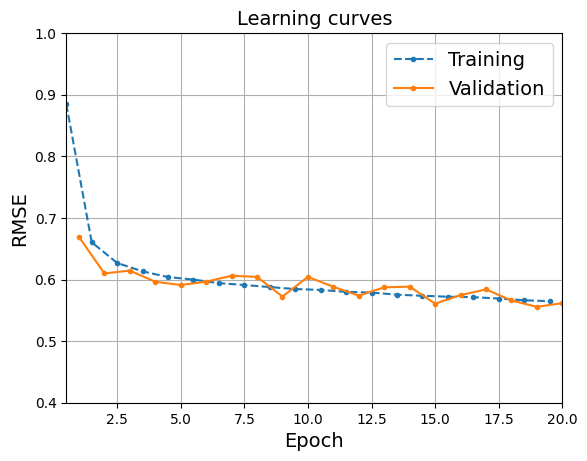

In [77]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

# Building Nonsequential Models Using Custom Modules

This `WideAndDeep` class defines a custom PyTorch model that implements the Wide & Deep learning architecture. This architecture is designed to combine the strengths of both linear (wide) and deep neural networks:

*   **`__init__(self, n_features)`**: The constructor sets up the layers:
    *   `super().__init__()`: Ensures that your `WideAndDeep` module is properly set up as a valid PyTorch module, inheriting all the necessary infrastructure from `nn.Module` before you add your specific layers and logic.
    *   `self.deep_stack`: This is a sequential deep neural network composed of three linear layers with ReLU activation functions. It processes the input features through several hidden layers.
    *   `self.output_layer`: This is the final linear layer that produces the model's output (e.g., a regression prediction). It takes as input the concatenated output from the deep stack and the original input features.

*   **`forward(self, X)`**: This method defines how data flows through the model:
    *   `deep_output = self.deep_stack(X)`: The input `X` is first passed through the deep network to extract complex, non-linear feature interactions.
    *   `wide_and_deep = torch.concat([X, deep_output], dim=1)`: The original input features `X` (the "wide" part) are directly concatenated with the `deep_output` (the "deep" part). This allows the model to learn simple, direct relationships (from the wide path) alongside more intricate, non-linear patterns (from the deep path).
    *   `return self.output_layer(wide_and_deep)`: The combined features are then fed into the output layer to produce the final prediction.

This architecture is particularly useful for tasks where both memorization of feature interactions (handled by the wide path, implicitly through the direct connection of `X` to the output layer) and generalization from new feature combinations (handled by the deep path) are important.

In [78]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + n_features, 1)

    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [79]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002  # the model changed, so did the optimal learning rate

In [80]:
#Testing the stuff in notes
for child in model.named_children():
  print(child)

('deep_stack', Sequential(
  (0): Linear(in_features=8, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=30, bias=True)
  (5): ReLU()
))
('output_layer', Linear(in_features=38, out_features=1, bias=True))


In [81]:
# extra code: train the model, exactly our previous models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo

What if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path?

This `WideAndDeepV2` class is an advanced version of the Wide & Deep architecture, specifically designed to handle cases where different subsets of input features are fed into the "wide" and "deep" paths of the network. It differs from `WideAndDeep` in how it prepares inputs for these paths.

*   **`__init__(self, n_features)`**: The constructor sets up the layers:
    *   `self.deep_stack`: This is a sequential deep neural network. Notably, its first linear layer expects `n_features - 2` inputs, indicating that only a subset of the original features will be processed by the deep path.
    *   `self.output_layer`: This is the final linear layer. It expects `30 + 5` inputs, meaning the output from the deep stack (30 neurons) is concatenated with 5 features from the original input for the wide path.

*   **`forward(self, X)`**: This method defines how data flows through the model:
    *   `X_wide = X[:, :5]`: This line extracts the first 5 features from the input tensor `X` to be used for the wide path. This is a specific subset of features.
    *   `X_deep = X[:, 2:]`: This line extracts features starting from the third one (`index 2`) to the end, to be used for the deep path. This subset overlaps with the wide features (features at index 2, 3, 4 are common) and also includes features not in the wide path.
    *   `deep_output = self.deep_stack(X_deep)`: The selected `X_deep` features are passed through the deep network.
    *   `wide_and_deep = torch.concat([X_wide, deep_output], dim=1)`: The selected `X_wide` features are concatenated with the `deep_output`. This creates the combined input for the final output layer.
    *   `return self.output_layer(wide_and_deep)`: The combined features are then fed into the output layer to produce the final prediction.

This version allows for more fine-grained control over which features contribute to the simple linear part (wide) and which are processed through the complex non-linear part (deep), potentially improving model performance by better leveraging feature characteristics.

In [82]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X):
        X_wide = X[:, :5]
        X_deep = X[:, 2:]
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [83]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

In [84]:
# extra code: train the model, exactly our previous models
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.8482, train metric: 1.3598, valid metric: 0.9100
Epoch 2/20, train loss: 0.6282, train metric: 0.7927, valid metric: 0.8028
Epoch 3/20, train loss: 0.5763, train metric: 0.7591, valid metric: 0.7567
Epoch 4/20, train loss: 0.5413, train metric: 0.7356, valid metric: 0.7290
Epoch 5/20, train loss: 0.5099, train metric: 0.7142, valid metric: 0.7011
Epoch 6/20, train loss: 0.4841, train metric: 0.6958, valid metric: 0.6816
Epoch 7/20, train loss: 0.4656, train metric: 0.6824, valid metric: 0.6670
Epoch 8/20, train loss: 0.4526, train metric: 0.6728, valid metric: 0.6576
Epoch 9/20, train loss: 0.4438, train metric: 0.6662, valid metric: 0.6539
Epoch 10/20, train loss: 0.4380, train metric: 0.6618, valid metric: 0.6498
Epoch 11/20, train loss: 0.4326, train metric: 0.6577, valid metric: 0.6470
Epoch 12/20, train loss: 0.4284, train metric: 0.6546, valid metric: 0.6447
Epoch 13/20, train loss: 0.4253, train metric: 0.6521, valid metric: 0.6452
Epoch 14/20, train lo

## Building Models with Multiple Inputs

This `WideAndDeepV3` class builds upon the previous Wide & Deep architectures by explicitly separating the inputs for the wide and deep paths. This design is particularly useful when you have distinct sets of features that you want to feed into each part of the model directly, rather than extracting them within the `forward` method.

*   **`__init__(self, n_features)`**: The constructor is identical to `WideAndDeepV2`:
    *   `self.deep_stack`: A sequential deep neural network. Its first linear layer expects `n_features - 2` inputs, meaning a specific subset of features is intended for the deep path.
    *   `self.output_layer`: The final linear layer. It expects `30 + 5` inputs, indicating that the output from the deep stack (30 neurons) is concatenated with 5 features from the wide path.

*   **`forward(self, X_wide, X_deep)`**: This method defines how data flows through the model and is the key difference:
    *   Instead of taking a single `X` and slicing it internally (as in `WideAndDeepV2`), this `forward` method **directly accepts two separate input tensors**: `X_wide` and `X_deep`.
    *   `deep_output = self.deep_stack(X_deep)`: The `X_deep` features are passed through the deep network.
    *   `wide_and_deep = torch.concat([X_wide, deep_output], dim=1)`: The `X_wide` features are concatenated with the `deep_output`.
    *   `return self.output_layer(wide_and_deep)`: The combined features are then fed into the output layer to produce the final prediction.

This explicit input separation makes the model more flexible, as it allows you to preprocess or obtain `X_wide` and `X_deep` independently before passing them to the model, and it makes the model's intended feature usage clearer.

In [85]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

The primary difference in this data preparation cell, compared to earlier steps, is the way `TensorDataset` is initialized. Instead of passing a single set of input features (e.g., `X_train`), it now accepts **multiple distinct input feature tensors** (`X_train[:, :5]` for the 'wide' path and `X_train[:, 2:]` for the 'deep' path), along with the target labels. This prepares the data to directly match the multiple input arguments expected by the `forward()` method of models like `WideAndDeepV3`.

In [86]:
torch.manual_seed(42)
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32)

This code cell introduces and defines two key functions, `evaluate_multi_in` and `train_multi_in`, specifically tailored for PyTorch models that accept **multiple input tensors** (like the `WideAndDeepV3` model). It also demonstrates how to set up and train such a model.

### `evaluate_multi_in` Function:
This function is for evaluating models with multiple inputs. Its main differences from the standard `evaluate_tm` are:
*   **Input Unpacking**: When iterating through the `data_loader`, it unpacks `(X_batch_wide, X_batch_deep, y_batch)` because the `TensorDataset` was configured to yield these three components.
*   **Device Transfer**: Both `X_batch_wide` and `X_batch_deep` are explicitly moved to the specified `device`.
*   **Model Call**: The model is called with separate arguments: `y_pred = model(X_batch_wide, X_batch_deep)` to match the `forward` method of `WideAndDeepV3`.

### `train_multi_in` Function:
This function handles the training loop for models with multiple inputs. Key distinctions from the standard `train2` function include:
*   **Input Unpacking**: It uses `for *X_batch_inputs, y_batch in train_loader:` to flexibly unpack all input tensors (in this case, `X_wide` and `X_deep`) into a list called `X_batch_inputs`.
*   **Device Transfer**: It iterates through `X_batch_inputs` to move each input tensor to the `device`.
*   **Model Call**: The model is called using argument unpacking: `y_pred = model(*X_batch_inputs)`. This passes the elements of `X_batch_inputs` (i.e., `X_batch_wide` and `X_batch_deep`) as separate arguments to the `model`'s `forward` method.
*   **Validation Call**: It uses the `evaluate_multi_in` function to calculate and record the validation metric.

### Model Initialization and Training Execution:
*   A `WideAndDeepV3` model is initialized with `n_features` and moved to the `device`.
*   An `SGD` optimizer, `MSELoss` criterion, and `torchmetrics.MeanSquaredError` metric are set up.
*   The `train_multi_in` function is then called with the model, optimizer, loss, metric, and the `_wd` suffixed data loaders (which provide the multiple inputs), to train the model for `n_epochs`.

In [87]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            X_batch_wide = X_batch_wide.to(device)
            X_batch_deep = X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

def train_multi_in(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            model.train()
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)
            y_pred = model(*X_batch_inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader_wd,
                         valid_loader_wd, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

This code cell defines a custom PyTorch `Dataset` called `WideAndDeepDataset`. This class is essential for preparing data in a structured way that can be easily used by PyTorch's `DataLoader`, especially when your model expects multiple, named inputs (like `X_wide` and `X_deep` for the `WideAndDeepV3` architecture when called with keyword arguments).

*   **`__init__(self, X_wide, X_deep, y)`**: The constructor takes three arguments:
    *   `X_wide`: The features intended for the 'wide' path of the model.
    *   `X_deep`: The features intended for the 'deep' path of the model.
    *   `y`: The target labels for the data.
    It simply stores these tensors as attributes of the dataset object.

*   **`__len__(self)`**: This method is required by PyTorch's `Dataset` interface. It returns the total number of samples in the dataset, which is determined by the length of the target `y` tensor.

*   **`__getitem__(self, idx)`**: This crucial method defines how a single sample (indexed by `idx`) is retrieved from the dataset. It returns:
    *   A dictionary `input_dict` containing the `X_wide` and `X_deep` tensors for the given index, under the keys "X_wide" and "X_deep" respectively. This format is particularly useful when you want to pass these inputs to a model using keyword arguments (e.g., `model(**inputs)`).
    *   The corresponding target label `self.y[idx]`.

This custom `Dataset` makes it convenient to manage and load data for models that have multiple distinct input branches.

In [88]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
        return input_dict, self.y[idx]

This code cell, building on the custom `WideAndDeepDataset`, prepares your data for training, validation, and testing by creating `DataLoader` instances. The key aspects are:

*   **Custom `Dataset` Usage**: It instantiates `WideAndDeepDataset` objects for the training, validation, and test sets. Crucially, it passes the sliced `X_train` (and `X_valid`, `X_test`) into their respective `X_wide` and `X_deep` components, explicitly defining which features go to which path.

*   **`DataLoader` for Batches**: It then wraps these `WideAndDeepDataset` objects with `DataLoader`s. These data loaders will yield batches, where each batch consists of a dictionary containing the `X_wide` and `X_deep` tensors (under their respective keys) and the corresponding `y` target tensor. This format perfectly matches the `forward` method signature of models that accept keyword arguments for their inputs (e.g., `model(**inputs)`).

*   **Shuffling**: `shuffle=True` is used for the `train_loader_named` to ensure that training samples are presented in a random order in each epoch, which is beneficial for model generalization.

In [89]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:, :5], X_deep=X_train[:, 2:], y=y_train)
train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:, :5], X_deep=X_valid[:, 2:], y=y_valid)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_data_named = WideAndDeepDataset(
    X_wide=X_test[:, :5], X_deep=X_test[:, 2:], y=y_test)
test_loader_named = DataLoader(test_data_named, batch_size=32)

This code cell defines `evaluate_named` and `train_named` functions, which are specialized for handling models that receive multiple inputs via a dictionary (i.e., named arguments), typically when using a custom `Dataset` like `WideAndDeepDataset`.

### `evaluate_named` Function:
This function evaluates the model on a given `data_loader`. Its key features include:
*   **Input Handling**: It iterates through the `data_loader`, which yields `(inputs_dict, y_batch)`. The `inputs_dict` contains named tensors (e.g., `{'X_wide': tensor_wide, 'X_deep': tensor_deep}`).
*   **Device Transfer**: It moves each tensor within the `inputs_dict` and the `y_batch` to the specified `device`.
*   **Model Call**: It calls the model's `forward` method using explicit keyword arguments: `y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])`.
*   **Metric Calculation**: It updates and computes the overall metric using the provided `metric` object (e.g., `torchmetrics.Accuracy`).

### `train_named` Function:
This function handles the training loop, adapting to models with named inputs:
*   **Input Handling**: Similar to `evaluate_named`, it iterates through `train_loader`, receiving `(inputs_dict, y_batch)`.
*   **Device Transfer**: All input tensors from `inputs_dict` are moved to the `device`.
*   **Model Call**: It uses the Python `**inputs` syntax (`y_pred = model(**inputs)`) to unpack the dictionary into keyword arguments for the model's `forward` method. This is a clean way to pass named inputs.
*   **Loss Calculation, Backpropagation, and Optimization**: These steps are standard for training, calculating loss, computing gradients, and updating parameters.
*   **Metric Tracking**: It tracks training loss, training metric, and crucially, calls `evaluate_named` to get the validation metric at the end of each epoch, printing the results.

The cell then initializes a `WideAndDeepV3` model, an `SGD` optimizer, `MSELoss`, and `RMSE` metric, and uses `train_named` to train the model with the `_named` suffixed data loaders, demonstrating how to train a multi-input model when data is provided as named inputs from a custom `Dataset`.

In [90]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])
            metric.update(y_pred, y_batch)
    return metric.compute()  # compute the final result at the end

def train_named(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_named(model, optimizer, mse, rmse, train_loader_named,
                      valid_loader_named, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

## Building Models with Multiple Outputs

This `WideAndDeepV4` class extends the Wide & Deep architecture to support **multiple outputs**, specifically adding an auxiliary output. This is useful for multi-task learning or for regularizing the deep path by forcing it to learn a useful intermediate representation.

*   **`__init__(self, n_features)`**: The constructor is similar to `WideAndDeepV3`, but with an important addition:
    *   `self.deep_stack`: The sequential deep neural network, taking `n_features - 2` inputs.
    *   `self.output_layer`: This is now explicitly referred to as the **main output layer**, combining `30` neurons from the deep stack with `5` wide features to produce one output.
    *   `self.aux_output_layer`: A new **auxiliary output layer**. It takes the output of the `deep_stack` (30 neurons) and produces a single auxiliary output. This auxiliary output is typically used for an auxiliary loss, encouraging the deep path to learn features that are useful for the main task.

*   **`forward(self, X_wide, X_deep)`**: This method now returns two outputs:
    *   `deep_output = self.deep_stack(X_deep)`: The `X_deep` features are passed through the deep network.
    *   `wide_and_deep = torch.concat([X_wide, deep_output], dim=1)`: The `X_wide` features are concatenated with the `deep_output`.
    *   `main_output = self.output_layer(wide_and_deep)`: The primary prediction is generated from the combined wide and deep features.
    *   `aux_output = self.aux_output_layer(deep_output)`: The auxiliary prediction is generated directly from the `deep_output`.
    *   `return main_output, aux_output`: The model now returns both the main prediction and the auxiliary prediction.

This architecture allows for more complex training schemes where different parts of the model contribute to different (or related) prediction tasks, often leading to better overall performance and generalization.

In [91]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(wide_and_deep)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

This code cell defines two functions, `evaluate_multi_out` and `train_multi_out`, specifically designed for PyTorch models that produce **multiple outputs** (like the `WideAndDeepV4` model). It also demonstrates how to set up and train such a model.

### `evaluate_multi_out` Function:
This function evaluates the model, similar to previous evaluation functions, but with a key difference:
*   **Multiple Output Handling**: When calling `y_pred, _ = model(**inputs)`, it expects the model to return multiple outputs. It uses only the *first* output (`y_pred`) for metric calculation, effectively ignoring the auxiliary output (`_`).

### `train_multi_out` Function:
This function handles the training loop for models with multiple outputs. Its key features include:
*   **Multiple Output Handling**: After the forward pass (`y_pred, y_pred_aux = model(**inputs)`), it captures both the main prediction (`y_pred`) and the auxiliary prediction (`y_pred_aux`).
*   **Combined Loss Calculation**: It calculates separate loss values for the main output (`main_loss`) and the auxiliary output (`aux_loss`). These losses are then combined into a single `loss` using a weighted sum (`0.8 * main_loss + 0.2 * aux_loss`). This is a common practice in multi-task learning, where the auxiliary loss helps regularize the model and guide the learning of intermediate representations.

### Model Initialization and Training Execution:
*   A `WideAndDeepV4` model (which has main and auxiliary output layers) is initialized and moved to the `device`.
*   An `SGD` optimizer, `MSELoss` criterion, and `torchmetrics.MeanSquaredError` metric are set up.
*   The `train_multi_out` function is then called with the model and the `_named` suffixed data loaders to train the model, leveraging the combined loss for optimization.

In [92]:
import torchmetrics

def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV4(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_out(model, optimizer, mse, rmse, train_loader_named,
                          valid_loader_named, n_epochs)

Epoch 1/20, train loss: 1.0693, train metric: 0.9506, valid metric: 0.7085
Epoch 2/20, train loss: 0.5817, train metric: 0.6946, valid metric: 0.6607
Epoch 3/20, train loss: 0.5010, train metric: 0.6581, valid metric: 0.6425
Epoch 4/20, train loss: 0.4690, train metric: 0.6497, valid metric: 0.6654
Epoch 5/20, train loss: 0.4503, train metric: 0.6420, valid metric: 0.6338
Epoch 6/20, train loss: 0.4387, train metric: 0.6373, valid metric: 0.6563
Epoch 7/20, train loss: 0.4315, train metric: 0.6330, valid metric: 0.6193
Epoch 8/20, train loss: 0.4249, train metric: 0.6302, valid metric: 0.6167
Epoch 9/20, train loss: 0.4116, train metric: 0.6202, valid metric: 0.6450
Epoch 10/20, train loss: 0.4085, train metric: 0.6198, valid metric: 0.5938
Epoch 11/20, train loss: 0.4073, train metric: 0.6197, valid metric: 0.5959
Epoch 12/20, train loss: 0.3914, train metric: 0.6078, valid metric: 0.6073
Epoch 13/20, train loss: 0.3847, train metric: 0.6033, valid metric: 0.5815
Epoch 14/20, train lo

# Building an Image Classifier with PyTorch

## Using TorchVision to Load the Dataset

This cell is responsible for loading and preparing the FashionMNIST dataset, a common benchmark for image classification tasks, using PyTorch's `torchvision` library. Here's a breakdown:

*   **`import torchvision`** and **`import torchvision.transforms.v2 as T`**:
    *   These lines import the necessary libraries. `torchvision` provides access to popular datasets, model architectures, and image transformations. `torchvision.transforms.v2` (aliased as `T`) offers advanced image processing utilities.

*   **`toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])`**:
    *   This creates a `Compose` object, which chains together multiple image transformations. When applied to an image, it will first:
        *   **`T.ToImage()`**: Convert the input (which might be a PIL Image or NumPy array) into a PyTorch `Image` tensor.
        *   **`T.ToDtype(torch.float32, scale=True)`**: Convert the image tensor's data type to `torch.float32` and scale its pixel values to the range `[0.0, 1.0]`. This is a standard practice for neural network inputs.

*   **`train_and_valid_data = torchvision.datasets.FashionMNIST(...)`**:
    *   This line loads the training portion of the FashionMNIST dataset. `root="datasets"` specifies where the data should be stored. `train=True` indicates the training set. `download=True` ensures the dataset is downloaded if it's not already present. `transform=toTensor` applies the defined transformations to each image as it's loaded.

*   **`test_data = torchvision.datasets.FashionMNIST(...)`**:
    *   Similar to the above, this loads the test portion of the FashionMNIST dataset (`train=False`).

*   **`torch.manual_seed(42)`**:
    *   Sets the random seed for PyTorch operations. This is crucial for reproducibility, ensuring that random splits or initializations yield the same results every time the code is run.

*   **`train_data, valid_data = torch.utils.data.random_split(train_and_valid_data, [55_000, 5_000])`**:
    *   This splits the `train_and_valid_data` (which initially contains 60,000 training samples) into two new datasets: `train_data` (55,000 samples) and `valid_data` (5,000 samples). This creates a dedicated validation set from the original training data, which is essential for monitoring model performance during training and tuning hyperparameters without touching the final test set.

In [93]:
import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

torch.manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.4MB/s]


In [94]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Each entry is a tuple (image, target):

In [95]:
X_sample, y_sample = train_data[0]

Each image has a shape \[channels, rows, columns\]. Grayscale images like in Fashion MNIST have a single channel (while RGB images have 3, and other types of images, such as satellite images, may have many more). Fashion images are grayscale and 28x28 pixels:

In [96]:
X_sample.shape

torch.Size([1, 28, 28])

In [97]:
X_sample.dtype

torch.float32

In [98]:
train_and_valid_data.classes[y_sample]

'Ankle boot'

## Building the Classifier

This code cell defines a custom PyTorch neural network model named `ImageClassifier` and then initializes an instance of this model, along with the loss function to be used for training.

### `ImageClassifier` Class Definition:

*   **`class ImageClassifier(nn.Module):`**:
    *   Defines a new class `ImageClassifier` that inherits from `nn.Module`. All custom PyTorch models must inherit from `nn.Module`.

*   **`def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):`**:
    *   This is the constructor for the model. It takes parameters defining the size of the input, hidden layers, and output layer.
    *   **`super().__init__()`**: Calls the constructor of the parent `nn.Module` class, which is necessary for PyTorch to properly track layers and parameters.
    *   **`self.mlp = nn.Sequential(...)`**: This creates a sequential container for the layers of the MLP (Multi-Layer Perceptron).
        *   **`nn.Flatten()`**: This layer flattens the input image tensor (e.g., from `[batch_size, 1, 28, 28]` to `[batch_size, 784]`). It converts the 2D image data into a 1D vector per sample, which is required for fully connected (`nn.Linear`) layers.
        *   **`nn.Linear(n_inputs, n_hidden1)`**: The first fully connected (dense) layer, mapping the flattened input features to `n_hidden1` neurons.
        *   **`nn.ReLU()`**: The Rectified Linear Unit activation function, which introduces non-linearity to the model.
        *   **`nn.Linear(n_hidden1, n_hidden2)`**: The second fully connected hidden layer, mapping `n_hidden1` neurons to `n_hidden2` neurons.
        *   **`nn.ReLU()`**: Another ReLU activation function.
        *   **`nn.Linear(n_hidden2, n_classes)`**: The output layer, mapping `n_hidden2` neurons to `n_classes` (the number of output categories). For classification tasks with `nn.CrossEntropyLoss`, this layer typically does *not* have an activation function like `softmax` because `CrossEntropyLoss` expects raw logits.

*   **`def forward(self, X):`**:
    *   This method defines the forward pass of the model. It describes how input data `X` flows through the network to produce an output.
    *   **`return self.mlp(X)`**: Simply passes the input `X` through the `mlp` (sequential stack of layers) defined in the constructor.

### Model Initialization and Loss Function Setup:

*   **`model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100, n_classes=10).to(device)`**:
    *   Creates an instance of the `ImageClassifier` model.
        *   `n_inputs=1 * 28 * 28`: For FashionMNIST, images are 28x28 pixels with 1 channel (grayscale), so the total number of input features after flattening is 784.
        *   `n_hidden1=300`, `n_hidden2=100`: Defines the number of neurons in the two hidden layers.
        *   `n_classes=10`: FashionMNIST has 10 classes (types of clothing).
    *   **`.to(device)`**: Moves the entire model (including its weights and biases) to the specified computation `device` (e.g., 'cuda' for GPU or 'cpu'). This is essential for leveraging hardware acceleration.

*   **`xentropy = nn.CrossEntropyLoss()`**:
    *   Initializes the `CrossEntropyLoss` function, which is commonly used for multi-class classification problems in PyTorch. As mentioned, this loss function internally applies `softmax` to the model's raw logits before calculating the cross-entropy, so your model's output layer should not have an explicit `softmax` activation.

In [99]:
class ImageClassifier(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_inputs, n_hidden1),
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Linear(n_hidden2, n_classes)
        )

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                        n_classes=10).to(device)
xentropy = nn.CrossEntropyLoss()

This code cell configures the optimizer and the metric for evaluating the model, and then starts the training process.

*   **`optimizer = torch.optim.SGD(model.parameters(), lr=0.1)`**:
    *   This line initializes the **optimizer** for your model, using the Stochastic Gradient Descent (SGD) algorithm.
        *   **`model.parameters()`**: This argument tells the optimizer *which* parameters (weights and biases) of your neural network `model` it should update. PyTorch automatically tracks all tensors within `model` that have `requires_grad=True`.
        *   **`lr=0.1`**: This sets the **learning rate** to 0.1. The learning rate is a crucial hyperparameter that determines the step size taken during each gradient descent update.

*   **`accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)`**:
    *   This initializes an **accuracy metric** using the `torchmetrics` library.
        *   **`torchmetrics.Accuracy`**: This is a dedicated accuracy metric provided by `torchmetrics`, designed to be efficient and correctly handle batch-wise calculations.
        *   **`task="multiclass"`**: Specifies that this is a multiclass classification problem.
        *   **`num_classes=10`**: Indicates there are 10 distinct classes in the FashionMNIST dataset.
        *   **`.to(device)`**: Moves the accuracy metric's internal state (if any) to the same computing `device` (e.g., GPU) as the model, ensuring consistent calculations.

*   **`_ = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader, n_epochs)`**:
    *   This is the function call that initiates the **training loop**.
        *   **`train2`**: This is a custom training function (defined in a previous cell) that handles the epoch-based training process, including forward passes, loss calculation, backward passes, parameter updates, and tracking of training and validation metrics.
        *   The arguments passed are the `model` to be trained, the `optimizer` to update parameters, the `xentropy` (CrossEntropyLoss) as the criterion (loss function), the `accuracy` metric, the `train_loader` for training data, the `valid_loader` for validation data, and `n_epochs` (the total number of training epochs, which was previously defined as 20).

In [100]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
_ = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader,
           n_epochs)

Epoch 1/20, train loss: 0.6058, train metric: 0.7816, valid metric: 0.8416
Epoch 2/20, train loss: 0.4059, train metric: 0.8497, valid metric: 0.8372
Epoch 3/20, train loss: 0.3633, train metric: 0.8663, valid metric: 0.8530
Epoch 4/20, train loss: 0.3359, train metric: 0.8762, valid metric: 0.8660
Epoch 5/20, train loss: 0.3147, train metric: 0.8835, valid metric: 0.8754
Epoch 6/20, train loss: 0.2991, train metric: 0.8881, valid metric: 0.8666
Epoch 7/20, train loss: 0.2859, train metric: 0.8916, valid metric: 0.8622
Epoch 8/20, train loss: 0.2745, train metric: 0.8971, valid metric: 0.8722
Epoch 9/20, train loss: 0.2639, train metric: 0.9007, valid metric: 0.8834
Epoch 10/20, train loss: 0.2531, train metric: 0.9041, valid metric: 0.8810
Epoch 11/20, train loss: 0.2463, train metric: 0.9068, valid metric: 0.8850
Epoch 12/20, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8910
Epoch 13/20, train loss: 0.2303, train metric: 0.9125, valid metric: 0.8870
Epoch 14/20, train lo

In [101]:
model.eval()
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)
with torch.no_grad():
    y_pred_logits = model(X_new)
y_pred = y_pred_logits.argmax(dim=1)  # index of the largest logit
y_pred

tensor([7, 4, 2], device='cuda:0')

This code cell demonstrates how to use a trained PyTorch model to make predictions on new, unseen data, a process often referred to as **inference**.

*   **`model.eval()`**:
    *   This sets the model to evaluation mode. This is crucial during inference because certain layers (like `Dropout` and `BatchNorm`) behave differently during training and evaluation. In evaluation mode, `Dropout` layers are inactive (they don't drop units), and `BatchNorm` layers use their learned running statistics instead of batch statistics. This ensures consistent and deterministic predictions.

*   **`X_new, y_new = next(iter(valid_loader))`**:
    *   This line retrieves the *first batch* of data from the `valid_loader`. `iter(valid_loader)` creates an iterator, and `next()` gets the next item (which is a batch). `X_new` will contain the input images, and `y_new` will contain their corresponding true labels.

*   **`X_new = X_new[:3].to(device)`**:
    *   This takes only the first 3 samples from the retrieved batch (`X_new[:3]`) and moves them to the specified `device` (e.g., GPU). This is done to demonstrate prediction on a small subset of data.

*   **`with torch.no_grad():`**:
    *   This is a context manager that disables PyTorch's autograd engine. During inference, you don't need to compute gradients because you're not updating the model's weights. Disabling gradient computation offers several benefits:
        *   **Reduced Memory Usage**: No intermediate activations or gradient information needs to be stored.
        *   **Faster Computation**: Operations are faster because PyTorch doesn't perform the overhead of building the computation graph.
        *   **Prevents Accidental Updates**: Ensures that no model parameters are accidentally modified.

*   **`y_pred_logits = model(X_new)`**:
    *   Inside the `torch.no_grad()` block, the `X_new` (input images) are passed through the `model`'s forward pass. The output, `y_pred_logits`, represents the raw scores (logits) generated by the model for each class for each input image. For classification, these are typically pre-softmax values.

*   **`y_pred = y_pred_logits.argmax(dim=1)`**:
    *   **`argmax(dim=1)`**: This function finds the index of the maximum value along `dimension 1` (which corresponds to the class dimension for a batch of predictions). The `argmax` operation effectively selects the class with the highest predicted logit score as the model's prediction for each sample.
    *   `y_pred` will be a tensor containing the predicted class labels (as integers) for the `X_new` samples.

*   **`y_pred`**:
    *   This line simply displays the `y_pred` tensor, showing the predicted class indices for the first three samples.

In [102]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sneaker', 'Coat', 'Pullover']

Let's check whether the model made the correct predictions:

In [103]:
y_new[:3]

tensor([7, 4, 2])


All correct! 😃

What if we want the model's estimated probabilities?

This code cell calculates the estimated class probabilities from the model's raw output (logits) using the `softmax` activation function.

*   **`import torch.nn.functional as F`**:
    *   Imports the `torch.nn.functional` module, commonly aliased as `F`. This module provides various functions for neural network operations, including activation functions like `softmax`.

*   **`y_proba = F.softmax(y_pred_logits, dim=1)`**:
    *   This is the core step. The `F.softmax()` function is applied to `y_pred_logits` (the raw output from your model).
        *   **`y_pred_logits`**: These are the unnormalized scores (logits) that the neural network outputs for each class. They can be positive, negative, or zero.
        *   **`dim=1`**: This argument specifies that the `softmax` operation should be applied along `dimension 1` of the `y_pred_logits` tensor. In a typical classification output where `y_pred_logits` has a shape `[batch_size, num_classes]`, `dim=1` means that for each sample in the batch, the `softmax` is computed across its `num_classes` values. The result is a set of probabilities for each sample that sum to 1.
    *   The `softmax` function converts the logits into a probability distribution, where each value is between 0 and 1, and the sum of probabilities for all classes for a given sample is 1.

*   **`if device == "mps":
    y_proba = y_proba.cpu()`**:
    *   This is a conditional statement to handle a specific behavior for Apple Silicon (MPS) devices. On some PyTorch versions or configurations, `round()` might not be directly available or behave as expected on MPS tensors. Moving the tensor to the CPU (`.cpu()`) before rounding ensures consistent behavior across different devices, although it might incur a minor performance overhead if `round()` was directly supported on MPS.

*   **`y_proba.round(decimals=3)`**:
    *   This rounds the calculated probabilities to 3 decimal places for easier readability. The `round()` method (or function) is a utility to format the output, not to change the underlying precision of the `y_proba` tensor itself, which remains `float32` or `float64`.

In [104]:
import torch.nn.functional as F
y_proba = F.softmax(y_pred_logits, dim=1)
if device == "mps":
    y_proba = y_proba.cpu()
y_proba.round(decimals=3)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000, 0.9110, 0.0000,
         0.0880],
        [0.0000, 0.0000, 0.0040, 0.0000, 0.9960, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.6250, 0.0000, 0.3350, 0.0000, 0.0390, 0.0000, 0.0000,
         0.0000]], device='cuda:0')

This code cell extracts the top 4 predicted class probabilities and their corresponding indices (class labels) from the model's output logits. It's useful for understanding the model's confidence across its highest predictions.

*   **`y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)`**:
    *   **`torch.topk()`**: This function is used to find the `k` largest elements along a given dimension of a tensor. It returns both the values and their original indices.
        *   **`y_pred_logits`**: The raw output (logits) from the model for each class.
        *   **`k=4`**: Specifies that we want to retrieve the 4 highest logit values.
        *   **`dim=1`**: Indicates that the operation should be performed across the class dimension (for each sample in the batch).
    *   `y_top4_values` will contain the 4 highest logit values for each sample.
    *   `y_top4_indices` will contain the original class indices corresponding to those 4 highest logit values.

*   **`y_top4_probas = F.softmax(y_top4_values, dim=1)`**:
    *   The `F.softmax()` function is then applied specifically to these `y_top4_values`. This converts these top 4 logit values into a probability distribution. It's important to note that these probabilities will sum to 1 only *among themselves* (the top 4 classes), not across all 10 possible classes, because they are calculated only from the subset of selected logits.

*   **`if device == "mps":
    y_top4_probas = y_top4_probas.cpu()`**:
    *   Similar to the previous cell, this ensures compatibility and correct behavior for `round()` operations if the `device` is Apple Silicon (MPS).

*   **`y_top4_probas.round(decimals=3)`**:
    *   Rounds the calculated top 4 probabilities to 3 decimal places for clearer display.

In [105]:
y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)
y_top4_probas = F.softmax(y_top4_values, dim=1)
if device == "mps":
    y_top4_probas = y_top4_probas.cpu()
y_top4_probas.round(decimals=3)

tensor([[0.9110, 0.0880, 0.0010, 0.0000],
        [0.9960, 0.0040, 0.0000, 0.0000],
        [0.6250, 0.3350, 0.0390, 0.0000]], device='cuda:0')

In [106]:
y_top4_indices

tensor([[7, 9, 5, 8],
        [4, 2, 6, 0],
        [2, 4, 6, 0]], device='cuda:0')

This code cell calculates the total number of **trainable parameters** in your `model`.

*   **`model.parameters()`**:
    *   This is a method available for all `nn.Module` objects in PyTorch. It returns an iterator over all the parameters (weights and biases) that are part of the model and have `requires_grad=True`. These are the parameters that will be updated during the training process by the optimizer.

*   **`param.numel()`**:
    *   For each `param` (which is a tensor representing a weight matrix or a bias vector) obtained from `model.parameters()`, `param.numel()` returns the total number of elements (i.e., scalar values) within that tensor. For example, if a weight matrix has a shape of `(300, 784)`, `numel()` would return `300 * 784 = 235200`.

*   **`[param.numel() for param in model.parameters()]`**:
    *   This is a list comprehension that iterates through all the parameters in the model and calculates the number of elements for each parameter, creating a list of these counts.

*   **`sum(...)`**:
    *   Finally, the `sum()` function adds up all the numbers in the list generated by the list comprehension. The result is the grand total of all trainable scalar parameters (weights and biases) in the entire neural network model.

This number gives you an idea of the model's complexity and size. A model with more parameters generally has a higher capacity to learn complex patterns but also requires more data to train effectively and is more prone to overfitting if not regularized properly.

In [107]:
sum([param.numel() for param in model.parameters()])

266610

# Hyperparameter Tuning using Optuna

This code cell defines the `objective` function, which is the heart of hyperparameter tuning with the Optuna library.

*   **`import optuna`**:
    *   Imports the Optuna library, a popular open-source hyperparameter optimization framework.

*   **`def objective(trial):`**:
    *   This defines the `objective` function. Optuna will repeatedly call this function, passing in a `trial` object. The `trial` object is used to suggest hyperparameter values and report results.

*   **`learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)`**:
    *   This line asks Optuna's `trial` object to suggest a value for the `learning_rate` hyperparameter. It will sample a floating-point number between `1e-5` (0.00001) and `1e-1` (0.1). The `log=True` argument means that the sampling will be done on a logarithmic scale, which is often suitable for learning rates.

*   **`n_hidden = trial.suggest_int("n_hidden", 20, 300)`**:
    *   This suggests an integer value for `n_hidden`, representing the number of neurons in the hidden layers (in this case, both `n_hidden1` and `n_hidden2` are set to this value). The range for this integer is between 20 and 300, inclusive.

*   **`model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden, n_hidden2=n_hidden, n_classes=10).to(device)`**:
    *   A new `ImageClassifier` model is instantiated using the suggested `n_hidden` value for both hidden layers. This ensures that each trial evaluates a model with a different architecture (or at least different hidden layer sizes).
    *   The model is immediately moved to the appropriate `device` (CPU or GPU).

*   **`optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)`**:
    *   An `SGD` optimizer is set up for this trial's model, using the `learning_rate` suggested by Optuna.

*   **`xentropy = nn.CrossEntropyLoss()`**:
    *   The `CrossEntropyLoss` function is initialized as the criterion for this trial.

*   **`accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)`** and **`accuracy = accuracy.to(device)`**:
    *   A `torchmetrics.Accuracy` object is created and moved to the device to evaluate the model's performance during training.

*   **`history = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader, n_epochs=10)`**:
    *   The `train2` function (defined earlier) is called to train the model using the current set of hyperparameters for 10 epochs. The `history` object contains the training and validation metrics over these epochs.

*   **`validation_accuracy = max(history["valid_metrics"])`**:
    *   From the `history` of the training, the best (maximum) validation accuracy achieved across the 10 epochs is extracted. This is the metric that Optuna will try to maximize.

*   **`return validation_accuracy`**:
    *   The best validation accuracy is returned by the `objective` function. Optuna uses this return value to guide its search for optimal hyperparameters.

In [108]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

This code cell sets up and initiates the hyperparameter optimization study using Optuna.

*   **`sampler = optuna.samplers.TPESampler(seed=42)`**:
    *   Initializes a `TPESampler` (Tree-structured Parzen Estimator) from Optuna. This is a popular and effective sampling algorithm that adaptively proposes new hyperparameter combinations based on the performance of previously evaluated trials. Setting `seed=42` ensures that the sampling process itself is reproducible.

*   **`study = optuna.create_study(direction="maximize", sampler=sampler)`**:
    *   Creates an Optuna `Study` object. A study is the central object in Optuna, managing the optimization process.
        *   **`direction="maximize"`**: Specifies that Optuna should try to maximize the objective function's return value (in our case, validation accuracy).
        *   **`sampler=sampler`**: Assigns the previously defined `TPESampler` to this study.

*   **`study.optimize(objective, n_trials=5)`**:
    *   This is the core call that starts the hyperparameter optimization.
        *   **`objective`**: The function that Optuna will call repeatedly. Each call to `objective` constitutes a `trial`, where a model is trained and evaluated with a specific set of suggested hyperparameters.
        *   **`n_trials=5`**: Specifies that Optuna should run 5 independent trials. In each trial, it will suggest a set of hyperparameters, execute the `objective` function, and record the result. The `TPESampler` will use the results of earlier trials to inform its suggestions for later trials, aiming to converge on better hyperparameters. In other words, a trial represents one complete execution of the objective function
        *   `Epochs` deal with how much a single model instance trains on its data while `trials` deal with how many different hyperparameter configurations are tested to find the best-performing model.

In [109]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2025-12-26 17:32:49,629] A new study created in memory with name: no-name-34cd8563-98c2-4f11-a447-d4568504b7be


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424


[I 2025-12-26 17:35:19,747] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6229, valid metric: 0.7338
Epoch 2/10, train loss: 0.6108, train metric: 0.7841, valid metric: 0.7992
Epoch 3/10, train loss: 0.5203, train metric: 0.8169, valid metric: 0.8094
Epoch 4/10, train loss: 0.4810, train metric: 0.8302, valid metric: 0.8310
Epoch 5/10, train loss: 0.4557, train metric: 0.8404, valid metric: 0.8352
Epoch 6/10, train loss: 0.4387, train metric: 0.8460, valid metric: 0.8442
Epoch 7/10, train loss: 0.4240, train metric: 0.8512, valid metric: 0.8408
Epoch 8/10, train loss: 0.4123, train metric: 0.8566, valid metric: 0.8514
Epoch 9/10, train loss: 0.3998, train metric: 0.8601, valid metric: 0.8532


[I 2025-12-26 17:37:48,374] Trial 1 finished with value: 0.8547999858856201 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.3897, train metric: 0.8638, valid metric: 0.8548
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898
Epoch 7/10, train loss: 2.2623, train metric: 0.1933, valid metric: 0.1932
Epoch 8/10, train loss: 2.2554, train metric: 0.2000, valid metric: 0.2022
Epoch 9/10, train loss: 2.2485, train metric: 0.2122, valid metric: 0.2160


[I 2025-12-26 17:40:16,510] Trial 2 finished with value: 0.23340000212192535 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2414, train metric: 0.2299, valid metric: 0.2334
Epoch 1/10, train loss: 2.3035, train metric: 0.1373, valid metric: 0.1526
Epoch 2/10, train loss: 2.3005, train metric: 0.1569, valid metric: 0.1724
Epoch 3/10, train loss: 2.2975, train metric: 0.1755, valid metric: 0.1896
Epoch 4/10, train loss: 2.2945, train metric: 0.1941, valid metric: 0.2132
Epoch 5/10, train loss: 2.2914, train metric: 0.2105, valid metric: 0.2288
Epoch 6/10, train loss: 2.2884, train metric: 0.2261, valid metric: 0.2418
Epoch 7/10, train loss: 2.2853, train metric: 0.2419, valid metric: 0.2580
Epoch 8/10, train loss: 2.2823, train metric: 0.2581, valid metric: 0.2742
Epoch 9/10, train loss: 2.2792, train metric: 0.2736, valid metric: 0.2918


[I 2025-12-26 17:42:44,033] Trial 3 finished with value: 0.30959999561309814 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2761, train metric: 0.2897, valid metric: 0.3096
Epoch 1/10, train loss: 1.8379, train metric: 0.4869, valid metric: 0.6208
Epoch 2/10, train loss: 0.9751, train metric: 0.6666, valid metric: 0.6978
Epoch 3/10, train loss: 0.7608, train metric: 0.7253, valid metric: 0.7416
Epoch 4/10, train loss: 0.6704, train metric: 0.7639, valid metric: 0.7720
Epoch 5/10, train loss: 0.6108, train metric: 0.7913, valid metric: 0.7906
Epoch 6/10, train loss: 0.5687, train metric: 0.8053, valid metric: 0.8050
Epoch 7/10, train loss: 0.5386, train metric: 0.8164, valid metric: 0.8082
Epoch 8/10, train loss: 0.5158, train metric: 0.8243, valid metric: 0.8214
Epoch 9/10, train loss: 0.4988, train metric: 0.8279, valid metric: 0.8220


[I 2025-12-26 17:45:14,400] Trial 4 finished with value: 0.8220000267028809 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.4842, train metric: 0.8330, valid metric: 0.8092


In [110]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [111]:
study.best_value

0.8547999858856201

This code cell defines an updated `objective` function for Optuna hyperparameter tuning, which is more robust as it incorporates **early stopping (pruning)**.

### Differences from the Previous `objective` Function:

1.  **Data Loaders as Arguments**: The function now explicitly accepts `train_loader` and `valid_loader` as arguments: `def objective(trial, train_loader, valid_loader):`. In the previous version, these were implicitly available in the global scope where `objective` was defined.

2.  **Iterative Training within the Objective**: Instead of calling `train2` once for all `n_epochs`, this version includes a loop `for epoch in range(n_epochs):`.
    *   Inside this loop, `train2` is called for *one epoch at a time* (`n_epochs=1`). This allows Optuna to monitor the trial's performance epoch by epoch.
    *   the actual number of epochs for a not-pruned trial is determined by the n_epochs in the objective function's for loop (e.g., 20 epochs in your case)

3.  **Tracking `best_validation_accuracy`**: The function now keeps track of the `best_validation_accuracy` achieved over the epochs within a single trial. This ensures that the function returns the *peak* performance of that hyperparameter configuration, not just the performance from the last epoch.

4.  **`trial.report(validation_accuracy, epoch)`**: This is a key addition for Optuna's pruning functionality.
    *   At the end of each epoch, the current `validation_accuracy` and the `epoch` number are reported to Optuna. This allows Optuna's pruner to track the performance of the trial over time.

5.  **`if trial.should_prune(): raise optuna.TrialPruned()`**: This is the core of **early stopping (pruning)**.
    *   After reporting the current performance, `trial.should_prune()` is called. Optuna's `pruner` (which we will define shortly, e.g., `MedianPruner`) analyzes the reported intermediate results of the current trial against other trials.
    *   If the pruner determines that the current trial is unlikely to yield better results than already-found good trials, it returns `True`.
    *   When `True`, a `optuna.TrialPruned()` exception is raised, which immediately stops the current trial. This saves computational resources by avoiding the completion of unpromising trials, allowing Optuna to focus on more promising hyperparameter combinations faster.

### How it Works:

This enhanced `objective` function allows Optuna to not only search for good hyperparameters but also to intelligently stop training models that are underperforming early on. This can significantly speed up the hyperparameter tuning process, especially when training each trial takes a considerable amount of time.

In [112]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

These two consecutive cells both aim to create a callable object (`objective_with_data`) that, when called with a `trial` argument, will internally call our `objective` function with the `trial` *and* the `train_loader` and `valid_loader` already provided.

They achieve the same functional outcome, but use slightly different Python constructs:

1.  **`objective_with_data = lambda trial: objective(trial, train_loader=train_loader, valid_loader=valid_loader)`**:
    *   This uses a `lambda` function, which is a small, anonymous function defined in-line.
    *   It defines a new function that takes `trial` as its only explicit argument.
    *   When `objective_with_data(some_trial)` is called, it executes `objective(some_trial, train_loader=train_loader, valid_loader=valid_loader)`, effectively passing the pre-set data loaders.
    *   **Pros**: Simple and concise for straightforward one-liner functions.
    *   **Cons**: Can become less readable for more complex argument bindings or multi-line logic.

2.  **`from functools import partial
objective_with_data = partial(objective, train_loader=train_loader, valid_loader=valid_loader)`**:
    *   This uses `functools.partial`, which is a standard library function designed specifically for partial application of functions.
    *   `partial()` returns a new callable object that behaves like `objective`, but with some of its arguments pre-filled.
    *   When `objective_with_data(some_trial)` is called, `partial` correctly passes `some_trial` as the first positional argument to `objective`, while `train_loader` and `valid_loader` are passed as keyword arguments as specified during its creation.
    *   **Pros**: Explicitly designed for this use case, often considered more idiomatic and robust for partial function application, especially when dealing with many arguments or more complex function signatures. Can be slightly more efficient as it doesn't create a new function scope every time like a lambda might in some contexts.
    *   **Cons**: Requires an import from `functools`, and for very simple cases, `lambda` might appear slightly shorter.

Both cells achieve the exact same effect in this specific context: they create a version of the `objective` function that is ready to be called by `study.optimize()` (which only provides the `trial` argument) while still having access to the necessary `train_loader` and `valid_loader`.

In [113]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

In [114]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

This code cell sets up and initiates the hyperparameter optimization study using Optuna, incorporating a pruning strategy to accelerate the search.

*   **`torch.manual_seed(42)`**:
    *   Sets the random seed for PyTorch, ensuring reproducibility of model training within each trial.

*   **`sampler = optuna.samplers.TPESampler(seed=42)`**:
    *   Initializes a `TPESampler` (Tree-structured Parzen Estimator). This sampling algorithm intelligently proposes new hyperparameter combinations based on the performance of previously evaluated trials. The `seed=42` ensures reproducible sampling.

*   **`pruner = optuna.pruners.MedianPruner()`**:
    *   This is a significant addition compared to the previous study setup. A `MedianPruner` is initialized. Pruners are strategies that Optuna uses to **stop unpromising trials early** during the optimization process.
        *   The `MedianPruner` works by comparing the intermediate performance of a trial (reported epoch by epoch by the `objective` function) to the median performance of other trials that have completed the same number of steps (epochs).
        *   If a trial's performance falls below this median threshold, it is deemed unpromising and is *pruned* (stopped prematurely). This saves computational resources by not completing full training for hyperparameter sets that are unlikely to yield good results.

*   **`study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)`**:
    *   Creates an Optuna `Study` object. Here, the `pruner` is passed to the study, enabling the early stopping mechanism.
        *   **`direction="maximize"`**: Specifies that Optuna should try to maximize the objective function's return value (validation accuracy).
        *   **`sampler=sampler`**: Assigns the `TPESampler` to guide hyperparameter suggestions.
        *   **`pruner=pruner`**: Integrates the `MedianPruner` into the study.

*   **`study.optimize(objective_with_data, n_trials=20)`**:
    *   Starts the hyperparameter optimization process.
        *   **`objective_with_data`**: The `objective` function (which was previously wrapped with `partial` or `lambda`) is called repeatedly.
        *   **`n_trials=20`**: Optuna will attempt to run 20 trials. However, due to the `pruner`, some of these trials might be stopped early if they are not performing well, meaning not all 20 trials will necessarily complete all epochs specified within the `objective` function.

In [115]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

[I 2025-12-26 17:45:14,455] A new study created in memory with name: no-name-dd0dabd5-c23e-485a-bbbb-52c2c7391a4b


Epoch 1/1, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 1/1, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 1/1, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 1/1, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 1/1, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 1/1, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 1/1, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 1/1, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 1/1, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424
Epoch 1/1, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/1, train loss: 1.0162, train metric: 0.6611, valid metric: 0.6530
Epoch 1/1, train loss: 0.9665, train metric: 0.6689, valid metric: 0.6620
Epoch 1/1, train loss: 0.9258, train metric: 0.6761, valid metric: 0.6700
Epoch 1/1, train loss: 0.8919, train m

[I 2025-12-26 17:50:22,348] Trial 0 finished with value: 0.7089999914169312 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.7089999914169312.


Epoch 1/1, train loss: 0.7647, train metric: 0.7196, valid metric: 0.7082
Epoch 1/1, train loss: 1.1485, train metric: 0.6157, valid metric: 0.7332
Epoch 1/1, train loss: 0.6133, train metric: 0.7864, valid metric: 0.8082
Epoch 1/1, train loss: 0.5200, train metric: 0.8179, valid metric: 0.8136
Epoch 1/1, train loss: 0.4783, train metric: 0.8311, valid metric: 0.8232
Epoch 1/1, train loss: 0.4533, train metric: 0.8402, valid metric: 0.8020
Epoch 1/1, train loss: 0.4357, train metric: 0.8465, valid metric: 0.8446
Epoch 1/1, train loss: 0.4211, train metric: 0.8510, valid metric: 0.8276
Epoch 1/1, train loss: 0.4083, train metric: 0.8562, valid metric: 0.8398
Epoch 1/1, train loss: 0.3981, train metric: 0.8606, valid metric: 0.8532
Epoch 1/1, train loss: 0.3881, train metric: 0.8640, valid metric: 0.8582
Epoch 1/1, train loss: 0.3782, train metric: 0.8663, valid metric: 0.8532
Epoch 1/1, train loss: 0.3699, train metric: 0.8693, valid metric: 0.8566
Epoch 1/1, train loss: 0.3631, train m

[I 2025-12-26 17:55:29,858] Trial 1 finished with value: 0.8679999709129333 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 0.3191, train metric: 0.8862, valid metric: 0.8638
Epoch 1/1, train loss: 2.2998, train metric: 0.1078, valid metric: 0.1152
Epoch 1/1, train loss: 2.2923, train metric: 0.1305, valid metric: 0.1432
Epoch 1/1, train loss: 2.2856, train metric: 0.1605, valid metric: 0.1704
Epoch 1/1, train loss: 2.2797, train metric: 0.1872, valid metric: 0.1912
Epoch 1/1, train loss: 2.2744, train metric: 0.2091, valid metric: 0.2114
Epoch 1/1, train loss: 2.2693, train metric: 0.2230, valid metric: 0.2216
Epoch 1/1, train loss: 2.2643, train metric: 0.2332, valid metric: 0.2320
Epoch 1/1, train loss: 2.2591, train metric: 0.2408, valid metric: 0.2380
Epoch 1/1, train loss: 2.2538, train metric: 0.2456, valid metric: 0.2424
Epoch 1/1, train loss: 2.2481, train metric: 0.2493, valid metric: 0.2456
Epoch 1/1, train loss: 2.2422, train metric: 0.2511, valid metric: 0.2464
Epoch 1/1, train loss: 2.2360, train metric: 0.2534, valid metric: 0.2476
Epoch 1/1, train loss: 2.2296, train m

[I 2025-12-26 18:00:40,725] Trial 2 finished with value: 0.25380000472068787 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 2.1751, train metric: 0.2610, valid metric: 0.2538
Epoch 1/1, train loss: 2.3015, train metric: 0.0997, valid metric: 0.1028
Epoch 1/1, train loss: 2.2984, train metric: 0.1009, valid metric: 0.1050
Epoch 1/1, train loss: 2.2953, train metric: 0.1051, valid metric: 0.1124
Epoch 1/1, train loss: 2.2923, train metric: 0.1160, valid metric: 0.1270
Epoch 1/1, train loss: 2.2894, train metric: 0.1347, valid metric: 0.1496
Epoch 1/1, train loss: 2.2865, train metric: 0.1548, valid metric: 0.1652
Epoch 1/1, train loss: 2.2837, train metric: 0.1699, valid metric: 0.1800
Epoch 1/1, train loss: 2.2808, train metric: 0.1800, valid metric: 0.1872
Epoch 1/1, train loss: 2.2780, train metric: 0.1855, valid metric: 0.1916
Epoch 1/1, train loss: 2.2752, train metric: 0.1893, valid metric: 0.1960
Epoch 1/1, train loss: 2.2725, train metric: 0.1950, valid metric: 0.2008
Epoch 1/1, train loss: 2.2697, train metric: 0.2000, valid metric: 0.2026
Epoch 1/1, train loss: 2.2669, train m

[I 2025-12-26 18:05:54,067] Trial 3 finished with value: 0.23960000276565552 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 2.2469, train metric: 0.2429, valid metric: 0.2396
Epoch 1/1, train loss: 1.8945, train metric: 0.4923, valid metric: 0.6290
Epoch 1/1, train loss: 1.0016, train metric: 0.6582, valid metric: 0.6772
Epoch 1/1, train loss: 0.7747, train metric: 0.7115, valid metric: 0.7248
Epoch 1/1, train loss: 0.6864, train metric: 0.7551, valid metric: 0.7596
Epoch 1/1, train loss: 0.6268, train metric: 0.7833, valid metric: 0.7806
Epoch 1/1, train loss: 0.5830, train metric: 0.8000, valid metric: 0.7864
Epoch 1/1, train loss: 0.5500, train metric: 0.8113, valid metric: 0.8064
Epoch 1/1, train loss: 0.5252, train metric: 0.8184, valid metric: 0.8130
Epoch 1/1, train loss: 0.5061, train metric: 0.8238, valid metric: 0.8204
Epoch 1/1, train loss: 0.4908, train metric: 0.8290, valid metric: 0.8206
Epoch 1/1, train loss: 0.4777, train metric: 0.8338, valid metric: 0.8150
Epoch 1/1, train loss: 0.4681, train metric: 0.8375, valid metric: 0.8304
Epoch 1/1, train loss: 0.4591, train m

[I 2025-12-26 18:11:04,706] Trial 4 finished with value: 0.8429999947547913 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 0.4173, train metric: 0.8556, valid metric: 0.8430


[I 2025-12-26 18:11:20,330] Trial 5 pruned. 


Epoch 1/1, train loss: 2.3017, train metric: 0.1007, valid metric: 0.1056
Epoch 1/1, train loss: 0.8584, train metric: 0.7026, valid metric: 0.7982
Epoch 1/1, train loss: 0.5069, train metric: 0.8211, valid metric: 0.8228
Epoch 1/1, train loss: 0.4499, train metric: 0.8404, valid metric: 0.8340
Epoch 1/1, train loss: 0.4183, train metric: 0.8517, valid metric: 0.8512
Epoch 1/1, train loss: 0.3936, train metric: 0.8579, valid metric: 0.8478
Epoch 1/1, train loss: 0.3755, train metric: 0.8661, valid metric: 0.8520
Epoch 1/1, train loss: 0.3602, train metric: 0.8699, valid metric: 0.8640
Epoch 1/1, train loss: 0.3477, train metric: 0.8746, valid metric: 0.8666
Epoch 1/1, train loss: 0.3359, train metric: 0.8784, valid metric: 0.8712
Epoch 1/1, train loss: 0.3264, train metric: 0.8823, valid metric: 0.8712
Epoch 1/1, train loss: 0.3180, train metric: 0.8846, valid metric: 0.8698
Epoch 1/1, train loss: 0.3097, train metric: 0.8864, valid metric: 0.8784
Epoch 1/1, train loss: 0.3021, train m

[I 2025-12-26 18:16:23,649] Trial 6 finished with value: 0.8853999972343445 and parameters: {'learning_rate': 0.021368329072358756, 'n_hidden': 79}. Best is trial 6 with value: 0.8853999972343445.


Epoch 1/1, train loss: 0.2600, train metric: 0.9043, valid metric: 0.8854


[I 2025-12-26 18:16:38,689] Trial 7 pruned. 


Epoch 1/1, train loss: 2.2926, train metric: 0.1081, valid metric: 0.1064


[I 2025-12-26 18:16:53,457] Trial 8 pruned. 


Epoch 1/1, train loss: 2.2836, train metric: 0.1225, valid metric: 0.1526


[I 2025-12-26 18:17:08,025] Trial 9 pruned. 


Epoch 1/1, train loss: 2.2631, train metric: 0.2483, valid metric: 0.3554
Epoch 1/1, train loss: 0.6987, train metric: 0.7437, valid metric: 0.8334
Epoch 1/1, train loss: 0.4543, train metric: 0.8360, valid metric: 0.8288
Epoch 1/1, train loss: 0.4144, train metric: 0.8490, valid metric: 0.8488
Epoch 1/1, train loss: 0.3903, train metric: 0.8575, valid metric: 0.8354
Epoch 1/1, train loss: 0.3719, train metric: 0.8637, valid metric: 0.8454
Epoch 1/1, train loss: 0.3600, train metric: 0.8676, valid metric: 0.8538
Epoch 1/1, train loss: 0.3476, train metric: 0.8716, valid metric: 0.8554
Epoch 1/1, train loss: 0.3408, train metric: 0.8744, valid metric: 0.8570
Epoch 1/1, train loss: 0.3327, train metric: 0.8781, valid metric: 0.8526
Epoch 1/1, train loss: 0.3281, train metric: 0.8784, valid metric: 0.8620
Epoch 1/1, train loss: 0.3220, train metric: 0.8824, valid metric: 0.8650
Epoch 1/1, train loss: 0.3178, train metric: 0.8827, valid metric: 0.8680
Epoch 1/1, train loss: 0.3126, train m

[I 2025-12-26 18:22:04,659] Trial 10 finished with value: 0.8744000196456909 and parameters: {'learning_rate': 0.08165528450509137, 'n_hidden': 21}. Best is trial 6 with value: 0.8853999972343445.


Epoch 1/1, train loss: 0.2908, train metric: 0.8915, valid metric: 0.8604
Epoch 1/1, train loss: 0.6527, train metric: 0.7611, valid metric: 0.8132
Epoch 1/1, train loss: 0.4509, train metric: 0.8355, valid metric: 0.8452
Epoch 1/1, train loss: 0.4139, train metric: 0.8495, valid metric: 0.8462
Epoch 1/1, train loss: 0.3909, train metric: 0.8578, valid metric: 0.8522
Epoch 1/1, train loss: 0.3755, train metric: 0.8626, valid metric: 0.8498
Epoch 1/1, train loss: 0.3641, train metric: 0.8658, valid metric: 0.8566
Epoch 1/1, train loss: 0.3536, train metric: 0.8695, valid metric: 0.8534
Epoch 1/1, train loss: 0.3476, train metric: 0.8734, valid metric: 0.8600
Epoch 1/1, train loss: 0.3391, train metric: 0.8772, valid metric: 0.8556
Epoch 1/1, train loss: 0.3309, train metric: 0.8779, valid metric: 0.8600
Epoch 1/1, train loss: 0.3271, train metric: 0.8809, valid metric: 0.8628
Epoch 1/1, train loss: 0.3212, train metric: 0.8814, valid metric: 0.8650
Epoch 1/1, train loss: 0.3187, train m

[I 2025-12-26 18:27:00,242] Trial 11 finished with value: 0.8686000108718872 and parameters: {'learning_rate': 0.07553503645583189, 'n_hidden': 21}. Best is trial 6 with value: 0.8853999972343445.


Epoch 1/1, train loss: 0.2937, train metric: 0.8901, valid metric: 0.8550
Epoch 1/1, train loss: 0.6195, train metric: 0.7764, valid metric: 0.8170
Epoch 1/1, train loss: 0.4179, train metric: 0.8472, valid metric: 0.8488
Epoch 1/1, train loss: 0.3729, train metric: 0.8637, valid metric: 0.8500
Epoch 1/1, train loss: 0.3477, train metric: 0.8713, valid metric: 0.8666
Epoch 1/1, train loss: 0.3280, train metric: 0.8791, valid metric: 0.8670
Epoch 1/1, train loss: 0.3120, train metric: 0.8842, valid metric: 0.8716
Epoch 1/1, train loss: 0.2989, train metric: 0.8886, valid metric: 0.8730
Epoch 1/1, train loss: 0.2866, train metric: 0.8923, valid metric: 0.8780
Epoch 1/1, train loss: 0.2771, train metric: 0.8978, valid metric: 0.8544
Epoch 1/1, train loss: 0.2690, train metric: 0.8984, valid metric: 0.8774
Epoch 1/1, train loss: 0.2588, train metric: 0.9028, valid metric: 0.8776
Epoch 1/1, train loss: 0.2506, train metric: 0.9062, valid metric: 0.8808
Epoch 1/1, train loss: 0.2432, train m

[I 2025-12-26 18:31:54,286] Trial 12 finished with value: 0.8867999911308289 and parameters: {'learning_rate': 0.08525846269447772, 'n_hidden': 116}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2030, train metric: 0.9223, valid metric: 0.8744
Epoch 1/1, train loss: 0.8659, train metric: 0.7036, valid metric: 0.7850
Epoch 1/1, train loss: 0.5120, train metric: 0.8185, valid metric: 0.8188
Epoch 1/1, train loss: 0.4574, train metric: 0.8378, valid metric: 0.8286
Epoch 1/1, train loss: 0.4263, train metric: 0.8487, valid metric: 0.8460
Epoch 1/1, train loss: 0.4035, train metric: 0.8569, valid metric: 0.8448
Epoch 1/1, train loss: 0.3874, train metric: 0.8618, valid metric: 0.8476
Epoch 1/1, train loss: 0.3711, train metric: 0.8666, valid metric: 0.8340
Epoch 1/1, train loss: 0.3580, train metric: 0.8712, valid metric: 0.8580
Epoch 1/1, train loss: 0.3456, train metric: 0.8760, valid metric: 0.8660
Epoch 1/1, train loss: 0.3345, train metric: 0.8791, valid metric: 0.8686
Epoch 1/1, train loss: 0.3258, train metric: 0.8815, valid metric: 0.8662
Epoch 1/1, train loss: 0.3169, train metric: 0.8858, valid metric: 0.8750
Epoch 1/1, train loss: 0.3089, train m

[I 2025-12-26 18:36:48,779] Trial 13 finished with value: 0.8784000277519226 and parameters: {'learning_rate': 0.01891149541864801, 'n_hidden': 116}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2671, train metric: 0.9020, valid metric: 0.8784
Epoch 1/1, train loss: 0.9440, train metric: 0.6748, valid metric: 0.7730
Epoch 1/1, train loss: 0.5292, train metric: 0.8132, valid metric: 0.8262
Epoch 1/1, train loss: 0.4689, train metric: 0.8346, valid metric: 0.8306
Epoch 1/1, train loss: 0.4349, train metric: 0.8445, valid metric: 0.8290
Epoch 1/1, train loss: 0.4107, train metric: 0.8556, valid metric: 0.8436


[I 2025-12-26 18:38:18,540] Trial 14 pruned. 


Epoch 1/1, train loss: 0.3919, train metric: 0.8613, valid metric: 0.8300


[I 2025-12-26 18:38:34,457] Trial 15 pruned. 


Epoch 1/1, train loss: 1.8496, train metric: 0.4092, valid metric: 0.6042
Epoch 1/1, train loss: 0.7456, train metric: 0.7386, valid metric: 0.7672
Epoch 1/1, train loss: 0.4683, train metric: 0.8341, valid metric: 0.8424
Epoch 1/1, train loss: 0.4143, train metric: 0.8511, valid metric: 0.8464
Epoch 1/1, train loss: 0.3811, train metric: 0.8621, valid metric: 0.8568
Epoch 1/1, train loss: 0.3579, train metric: 0.8696, valid metric: 0.8682
Epoch 1/1, train loss: 0.3400, train metric: 0.8758, valid metric: 0.8690
Epoch 1/1, train loss: 0.3261, train metric: 0.8804, valid metric: 0.8708
Epoch 1/1, train loss: 0.3149, train metric: 0.8837, valid metric: 0.8794
Epoch 1/1, train loss: 0.3020, train metric: 0.8895, valid metric: 0.8714
Epoch 1/1, train loss: 0.2935, train metric: 0.8930, valid metric: 0.8400
Epoch 1/1, train loss: 0.2845, train metric: 0.8949, valid metric: 0.8720
Epoch 1/1, train loss: 0.2761, train metric: 0.8982, valid metric: 0.8792
Epoch 1/1, train loss: 0.2684, train m

[I 2025-12-26 18:43:39,291] Trial 16 finished with value: 0.8848000168800354 and parameters: {'learning_rate': 0.032666299131732864, 'n_hidden': 142}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2271, train metric: 0.9154, valid metric: 0.8800


[I 2025-12-26 18:43:54,397] Trial 17 pruned. 


Epoch 1/1, train loss: 1.5604, train metric: 0.5038, valid metric: 0.6536
Epoch 1/1, train loss: 0.6189, train metric: 0.7751, valid metric: 0.8314
Epoch 1/1, train loss: 0.4237, train metric: 0.8447, valid metric: 0.8492
Epoch 1/1, train loss: 0.3814, train metric: 0.8605, valid metric: 0.8582
Epoch 1/1, train loss: 0.3567, train metric: 0.8681, valid metric: 0.8622
Epoch 1/1, train loss: 0.3375, train metric: 0.8744, valid metric: 0.8674
Epoch 1/1, train loss: 0.3246, train metric: 0.8788, valid metric: 0.8480
Epoch 1/1, train loss: 0.3123, train metric: 0.8849, valid metric: 0.8644
Epoch 1/1, train loss: 0.3012, train metric: 0.8871, valid metric: 0.8734
Epoch 1/1, train loss: 0.2915, train metric: 0.8916, valid metric: 0.8760
Epoch 1/1, train loss: 0.2858, train metric: 0.8931, valid metric: 0.8758
Epoch 1/1, train loss: 0.2778, train metric: 0.8955, valid metric: 0.8804
Epoch 1/1, train loss: 0.2715, train metric: 0.8972, valid metric: 0.8616
Epoch 1/1, train loss: 0.2642, train m

[I 2025-12-26 18:48:59,309] Trial 18 finished with value: 0.8830000162124634 and parameters: {'learning_rate': 0.0954812841907134, 'n_hidden': 50}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8830


[I 2025-12-26 18:49:14,830] Trial 19 pruned. 


Epoch 1/1, train loss: 0.7417, train metric: 0.7395, valid metric: 0.7640


In [116]:
study.best_value

0.8867999911308289

In [117]:
study.best_params

{'learning_rate': 0.08525846269447772, 'n_hidden': 116}

# Saving and Loading a PyTorch Model

In [118]:
torch.save(model, "my_fashion_mnist.pt")

In [119]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)

In [120]:
loaded_model.eval()
y_pred_logits = loaded_model(X_new)

In [121]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")

In [122]:
type(model.state_dict())

collections.OrderedDict

This code cell demonstrates how to load a pre-trained model's parameters (weights and biases) into a newly created model instance. This is a common and recommended practice in PyTorch, especially when you want more flexibility, such as changing the hardware, making small modifications to the model architecture, or when sharing models.

*   **`new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100, n_classes=10)`**:
    *   First, a brand new instance of the `ImageClassifier` model is created. It's crucial that this `new_model` has the **exact same architecture** as the `model` that was originally saved. This ensures that the structure of the weights and biases (`state_dict`) will match when loading.

*   **`loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)`**:
    *   This line loads the saved state dictionary (the collection of learned parameters) from the specified file (`"my_fashion_mnist_weights.pt"`).
    *   `weights_only=True` is a good practice to explicitly indicate that you are expecting to load only the state dictionary and not the entire model object (which `torch.save(model, ...)` would save).

*   **`new_model.load_state_dict(loaded_weights)`**:
    *   This is the core operation. The `load_state_dict()` method of the `nn.Module` is used to populate the parameters of `new_model` with the values loaded from `loaded_weights`. PyTorch ensures that the keys (parameter names) and shapes in `loaded_weights` match those of `new_model`.

*   **`new_model.eval()`**:
    *   Finally, the `new_model` is immediately set to evaluation mode. This is important because, after loading pre-trained weights, you typically want to use the model for inference or further evaluation, and `model.eval()` ensures that layers like `Dropout` and `BatchNorm` behave correctly (e.g., `Dropout` is turned off, `BatchNorm` uses its learned running statistics).

In [123]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

This code cell shows a robust and recommended practice for saving a PyTorch model: combining the model's learned parameters (`state_dict`) with its architectural hyperparameters into a single file.

*   **`model_data = { ... }`**:
    *   A Python dictionary named `model_data` is created to store all necessary information for saving and later reloading the model.

*   **`"model_state_dict": model.state_dict()`**:
    *   This key-value pair stores the `state_dict` of the trained `model`. The `state_dict` is essentially a Python dictionary that maps each layer to its learnable parameters (weights and biases).

*   **`"model_hyperparameters": { ... }`**:
    *   This nested dictionary stores the hyperparameters that define the architecture of the `ImageClassifier` model.
        *   `"n_inputs"`, `"n_hidden1"`, `"n_hidden2"`, `"n_classes"`: These are the arguments required to instantiate an `ImageClassifier` object with the correct structure.

*   **`torch.save(model_data, "my_fashion_mnist_model.pt")`**:
    *   This line uses `torch.save()` to serialize the entire `model_data` dictionary into a single file named `"my_fashion_mnist_model.pt"`.

**Why this approach is beneficial:**
*   **Self-contained**: The saved file contains everything needed to reconstruct and load the model (both its architecture and its learned weights) without needing to manually remember or hardcode the architecture details.
*   **Flexibility**: When you load this file, you can easily extract the hyperparameters to create a new model instance and then load the `state_dict` into it.
*   **Maintainability**: It makes your model saving and loading process more explicit and less error-prone, especially as models become more complex or when collaborating on projects.

In [124]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

This code cell demonstrates how to load a complete PyTorch model (both its architecture and learned weights) from a single file, following the robust saving method discussed previously.

*   **`loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)`**:
    *   This line loads the entire Python dictionary that was previously saved to `"my_fashion_mnist_model.pt"`. This dictionary contains both the `"model_state_dict"` and the `"model_hyperparameters"`.
    *   `weights_only=True` is often used to ensure the file is opened in a way suitable for loading `state_dict`s, even though here we are loading a more complex dictionary containing hyperparameters as well. It's a best practice to ensure compatibility, though the content itself is a dictionary not just weights.

*   **`new_model = ImageClassifier(**loaded_data["model_hyperparameters"])`**:
    *   This is a powerful Python feature. `loaded_data["model_hyperparameters"]` retrieves the dictionary containing all the architectural parameters (like `n_inputs`, `n_hidden1`, etc.).
    *   The `**` operator then unpacks this dictionary, passing its key-value pairs as keyword arguments to the `ImageClassifier` constructor. This automatically recreates a new `ImageClassifier` instance with the exact same architecture as the saved model.

*   **`new_model.load_state_dict(loaded_data["model_state_dict"])`**:
    *   Once the `new_model` (architecture) is instantiated, this line loads the learned parameters (weights and biases) into it. `loaded_data["model_state_dict"]` provides the dictionary mapping parameter names to their saved values, and `load_state_dict()` populates the new model's parameters accordingly.

*   **`new_model.eval()`**:
    *   Finally, the `new_model` is set to evaluation mode. This is crucial for consistent inference, as it disables layers like `Dropout` and ensures `BatchNorm` uses its learned running statistics rather than batch statistics.

In [125]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

# Compiling and Optimizing a PyTorch Model

In [126]:
torchscript_model = torch.jit.trace(model, X_new)

In [127]:
torchscript_model = torch.jit.script(model)

In [128]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

In [129]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

In [130]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [131]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[ -3.3324,  -0.7572,  -4.1671,  -1.9444,  -1.6955,   2.0123,  -3.2624,
           8.6379,  -0.5685,   6.2972],
        [ -0.1434,  -3.8626,  11.8279,  -0.3164,  17.3995, -13.1888,   7.8158,
         -11.8338,  -1.4709,  -7.9412],
        [  0.3996,  -2.5537,   7.5992,   0.1775,   6.9748,  -6.1942,   4.8270,
          -5.8584,  -1.4327,  -4.3257]], device='cuda:0')

In [132]:
compiled_model = torch.compile(model)

In [133]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
W1226 18:49:25.457000 2340 torch/_inductor/utils.py:1558] [0/0] Not enough SMs to use max_autotune_gemm mode


# Exercise Solutions

## Exercises 1. to 12.

1. PyTorch is similar to NumPy is many ways, but it offers some extra features. The main ones are:
    * Auto-differentiation
    * Support for hardware accelerators
    * Includes optimizers and ready-to-use neural net components

2. `torch.exp()` returns a copy of the input tensor while `torch.exp_()` modifies it in place. Similarly, `torch.relu()` returns a copy while `torch.relu_()` modifies in place.

3. To create a new tensor on the GPU, you can use one of the following methods:
     * Set the `device` argument when calling `torch.tensor()`, `torch.rand()`, or other functions that create new tensors. For example, `torch.randn(10, device="cuda")` creates a new tensor on the CUDA GPU, with 10 random elements.
     * Create a new tensor on the CPU, then transfer it to the GPU by using calling its `to()` method, for example `torch.randn(10).to("cuda")`. However, it's more efficient to create the tensor directly on the GPU.
     * The `*_like()` functions such as `ones_like()` and `zeros_like()` create a new tensor on the same device as another tensor. They also use the same data type.
    * Lastly, if you execute an operation on a tensor that lives on the GPU, the result will generally be a new tensor on the GPU (unless you use an in-place operation such as `torch.exp_()`.

4. Here are three ways to perform tensor computations without using autograd:
    * Manipulate tensors created with `requires_grad=False` (which is the default).
    * Run the computations inside a `with torch.no_grad():` block.
    * Call the `detach()` method on the tensor you want to manipulate without autograd.

5. Here's what happens in each case:
    * The first code sample will work fine, it will _not_ cause a `RuntimeError`: indeed, the `cos()` method creates a new (non-leaf) tensor, then `exp_()` modifies it in place. During the backward pass, PyTorch is able to backpropagate through the `exp_()` operation because the derivative of exp(x) is exp(x), so PyTorch doesn't need to know what the input x was, it can just use the output of the forward pass (i.e., exp(x)) during the backward pass.
    * If you replace `z = t.cos().exp_()` with `z = t.cos_().exp()` then you will get a `RuntimeError` on that line ("_a leaf Variable that requires grad is being used in an in-place operation_"). Indeed, `t` is a leaf tensor (since it was created directly by the user, not the result of any computation) and you cannot apply an in-place operation on a leaf tensor with `requires_grad=True`.
    * If you replace `z = t.cos().exp_()` with `z = t.exp().cos_()`, then you will get a `RuntimeError` ("_one of the variables needed for gradient computation has been modified by an inplace operation_") during the backward pass. Indeed, the `exp()` operation relies on the fact that the derivative of exp(_t_) is exp(_t_), so it doesn't need to store the tensor `t` for the backward pass, instead it relies on the fact that it can just use the tensor returned by `t.exp()` (let's call it `e`). So far so good. But when we call the `cos_()` operation, it knows that it will need its input during the backward pass (since the derivative of cos(_e_) is –sin(_e_)), so it keeps a copy of its input tensor `e`. Next, it tries to modify the original `e` in-place, and in doing so it notices that this tensor is needed by another operation (`exp()`) for the backward pass, so it knows that something is fishy and it raises a `RuntimeError`.
    * The second code example will fail during backpropogation, with a `RuntimeError`. It's a very similar error to the previous one: the `cos()` operation stores a reference to its input tensor `v`, since `v` will be needed during the backward pass. Indeed, the derivative of cos(_v_) is –sin(_v_), so we need to save _v_. Next, the `sin_()` operation creates a copy of its input `v` (since it's an in-place operation, it knows that it must create a copy, not just preserve a reference) then it proceeds to modify the original `v`, but this tensor is needed to compute the gradient of `cos(_v_)`, so PyTorch raises a `RuntimeError`.
    * If you replace `w = v.cos() * v.sin_()` with `w = v.cos_() * v.sin()`, then there is no longer any `RuntimeError`. Indeed, the `cos_()` operation creates a copy of its input `v` so it can compute –sin(_v_) during the backward pass. The `sin()` operation is not in-place so in keeps a reference to its input `v`, not a copy. Backprop then runs just fine. However, there's a catch: by the time the `sin()` operation runs, its input `v` is no longer equal to 3.0, but instead it's equal to cos(3.0) since the `cos_()` modified `v` in place. As a result, `w = v.cos() * v.sin_()` does _not_ give the same result as `w = v.cos_() * v.sin()`. The former computes cos(3) * sin(3) while the latter computes cos(3) * sin(cos(3)). And of course the gradients change as well. That's why you should be very careful with in-place operations: they can make your code faster, sure, but they can also make it silently wrong.

6. A `Linear(100, 200)` module has 200 neurons: one per output. Its `weight` tensor has a shape of [200, 100] and its `bias` parameter has a shape of [200]. It expects its inputs to have a shape of [..., 100], for example [32, 100], or [32, 64, 100]. It treats all dimensions independently, except for the last one. The output shape is identical to the input shape, except that the last dimension is replaced with 200. For example, if the input shape is [32, 64, 100], then the output shape is [32, 64, 200].

7. The main steps of a PyTorch training loop are:
    * Prepare a batch of samples from the training set. You can use a `DataLoader` for this.
    * Optionally transfer these samples to the GPU (typically using `X_batch.to(device)` and `y_batch.to(device)`).
    * Run the inputs through the model, for example `y_pred = model(X_batch)`.
    * Compute the loss, for example `loss = criterion(y_pred, y_true)`.
    * Backpropagate through the loss using `loss.backward()`.
    * Perform an optimizer step: `optimizer.step()`.
    * Zero out the gradients: `optimizer.zero_grad()` (alternatively, you can do this before the backward pass, which may be safer if the gradients are non-zero before the training loop starts).
    * The whole training loop is often split into epochs, but this is optional.

8. It is recommended to create the optimizer _after_ the model is moved to the GPU because most optimizers have some internal state, and this state is usually allocated on the same device as the model parameters.

9. To speed up training when using a GPU, you should generally set the following `DataLoader` options:
    * Set the data loader's `num_workers` argument to the number of processes you want to use for data loading and preprocessing. This will often speed up training by pre-fetching the next batches on the CPU while the GPU is still working on the current batch. The optimal number depends on your platform, hardware, and workload, so you should experiment with different values.
    * Set the data loader's `prefetch_factor` argument to control the number of batches that each worker pre-fetches.
    * If spawning and synchronizing workers causes too much overhead (especially on Windows), you can try setting `persistent_workers=True` to reuse the same workers across epochs.

10. The main classification losses provided by PyTorch are:
    * `nn.CrossEntropyLoss`: this is generally the loss you want to use for multiclass classification, as it's efficient and numerically stable. This loss works directly on logits, not probabilities, so your model must not include the softmax activation function on the output layer. As a result, whenever you need to estimate probabilities, you must call the `F.softmax()` function on the logits output by the model.
    * `nn.BCEWithLogitsLoss` (BCE stands for _binary cross-entropy_): this is usually the loss you want to use for binary classification, for the same reason as `nn.CrossEntropyLoss`. Just like the previous loss, it works directly with logits, so your model must not include the sigmoid activation function on the output layer. Whenever you need to estimate probabilities, you must call the `F.sigmoid()` function on the logits output by the model. Note that some people prefer to use `nn.CrossEntropyLoss` even for binary classification, as it makes the code more consistent regardless of the number of classes, at a tiny computational and memory cost.
    * `nn.NLLLoss` (NLL stands for _negative log-likelihood_): this is an alternative to `nn.CrossEntropyLoss` for multiclass classification. To use it, your model must output log probabilities rather than logits. This can be done using `nn.LogSoftmax()` or `F.log_softmax()`. This approach is a bit slower than using `CrossEntropyLoss`, but it can be useful if you want your model to output log probabilities rather than logits, or when you wish to tweak the probability distribution before computing the final loss (indeed, it is sometimes easier to modify log probabilities rather than logits). Whenever you need to estimate probabilities, you must call `torch.exp()` on the model's outputs.
    * `nn.BCELoss`: this loss is an alternative to `nn.BCEWithLogitsLoss` for binary classification. It assumes that your model outputs probabilities rather than logits, so your model's output layer must use the sigmoid activation function. This can be convenient if you want your model to output probabilities directly, but it's a bit slower and less numerically stable than using `BCEWithLogitsLoss`.

11. Calling `model.train()` before training and `model.eval()` before evaluation is important because some layers (such as `nn.Dropout`, `nn.BatchNorm1d` or `nn.BatchNorm2d`) don't behave in the same way during training and evaluation, therefore we must tell the model in which mode it should run.

12. Both `torch.jit.trace()` and `torch.jit.script()` attempt to capture your model's computation graph and turn it into TorchScript code that can be optimized, saved, and deployed to various platforms. However, these functions work very differently:
    * The `torch.jit.trace()` function runs your model with a tracing tensor that captures which operations are executed. It's quite simple and works well for simple models, but it cannot capture conditionals (e.g., `if`, `elif`, `else`, `match`): it only captures the branch of the conditional that is actually executed during tracing. Similarly, if your model contains a loop (e.g., `for` or `while`) then tracing will not capture the loop itself, it will only capture the repeated operations.
    * The`torch.jit.script()` function actually parses your Python code to generate TorchScript code. This allows it to detect conditionals (as long as the conditions are tensors), and also capture loops. However, it only works with a subset of Python: you cannot use global variables, Python generators (`yield`), complex list comprehensions, variable length function arguments (`*args` or `**kwargs`), or `match` statements. Moreover, types must be fixed (a function cannot return an integer in some cases and a float in others), and you can only call other functions if they also respect these rules, so no standard library, no third-party libraries, etc.

## Exercise 13.

Exercise: _Use autograd to find the gradient vector of f(_x_, _y_) = sin(_x_<sup>2</sup> _y_) at the point (_x_, _y_) = (1.2, 3.4)._

In [134]:
def f(x, y):
    return torch.sin(x ** 2 * y)

x = torch.tensor(1.2, requires_grad=True)
y = torch.tensor(3.4, requires_grad=True)
result = f(x, y)
result.backward()

x.grad.item(), y.grad.item()

(1.489864706993103, 0.26291730999946594)

Alternatively, we could use a vectorized implementation:

In [135]:
def f(v):
    return torch.sin(v[0] ** 2 * v[1])

v = torch.tensor([1.2, 3.4], requires_grad=True)
result = f(v)
result.backward()

v.grad

tensor([1.4899, 0.2629])

We get the same partial derivatives, but this time they are wrapped in a gradient tensor.

Let's check this result by computing an approximation of the partial derivatives, using the fact that the partial derivative of a function $f(x, y)$ with regard to $x$, at a point $(x_0, y_0)$ is the limit of $\dfrac{f(x_0 + \epsilon, y_0) - f(x_0, y0)}{\epsilon}$ as $\epsilon$ approaches zero. Similarly, the partial derivative of that function with regard to $y$, at the same point $(x_0, y_0)$, is the limit of $\dfrac{f(x_0, y_0 + \epsilon) - f(x_0, y0)}{\epsilon}$ as $\epsilon$ approaches zero.

In [136]:
eps = 0.00005
df_dx = (f([x + eps, y]) - f([x, y])) / eps
df_dy = (f([x, y + eps]) - f([x, y])) / eps

df_dx.item(), df_dy.item()

(1.4901161193847656, 0.26226043701171875)

That's close enough.

We can also derive the equations for the partial derivatives mathematically (see the [calculus tutorial](math_differential_calculus.ipynb) to learn how to do this):
* $\dfrac{\partial f}{\partial x} = 2xy \cos(x^2 y)$
* $\dfrac{\partial f}{\partial x} = x^2 \cos(x^2 y)$

In [137]:
df_dx = 2 * x * y * torch.cos(x**2 * y)
df_dy = x ** 2 * torch.cos(x**2 * y)

df_dx.item(), df_dy.item()

(1.4898648262023926, 0.26291730999946594)

Perfect!

## Exercise 14.

Exercise: _Create a custom `Dense` module that replicates the functionality of an `nn.Linear` module followed by an `nn.ReLU` module. Try implementing it first using the `nn.Linear` and `nn.ReLU` modules, and then reimplement it using `nn.Parameter` and the `relu()` function._

This `Dense` class defines a custom PyTorch module that combines the functionality of an `nn.Linear` layer followed by an `nn.ReLU` activation function. Custom modules in PyTorch are created by inheriting from `nn.Module`.

*   **`class Dense(nn.Module):`**:
    *   Declares a new class `Dense` that inherits from `nn.Module`. This is the base class for all neural network modules in PyTorch, and it provides essential functionality like tracking parameters and managing submodules.

*   **`def __init__(self, in_features, out_features):`**:
    *   This is the constructor method for the `Dense` module. It takes `in_features` (the number of input features) and `out_features` (the number of output features/neurons) as arguments.
    *   **`super().__init__()`**: It's crucial to call the constructor of the parent `nn.Module` class first. This properly initializes the module's internal state.
    *   **`self.linear = nn.Linear(in_features, out_features)`**: This line creates an instance of PyTorch's `nn.Linear` module. This module performs a linear transformation (`y = xA^T + b`), which includes weights (`A`) and biases (`b`). It's stored as a submodule of `Dense`.
    *   **`self.relu = nn.ReLU()`**: This line creates an instance of PyTorch's `nn.ReLU` (Rectified Linear Unit) activation function. This is also stored as a submodule.

*   **`def forward(self, X):`**:
    *   This method defines the forward pass of the module. It dictates how input data `X` flows through the module to produce an output.
    *   **`return self.relu(self.linear(X))`**: The input `X` is first passed through the `self.linear` layer. The output of the linear layer is then passed through the `self.relu` activation function. The final result is returned.

In [138]:
class Dense(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.relu = nn.ReLU()

    def forward(self, X):
        return self.relu(self.linear(X))

Let's try it out:

In [139]:
torch.manual_seed(42)
dense = Dense(3, 5)
X = torch.randn(2, 3)
y_pred = dense(X)
y_pred.shape

torch.Size([2, 5])

Looks fine. We can double-check that it gives the right result:

This code cell verifies that the custom `Dense` module's `forward` method produces the same result as manually performing the linear transformation and ReLU activation.

*   **`y_pred_check = dense.relu(X @ dense.linear.weight.T + dense.linear.bias)`**:
    *   This line manually calculates the expected output of the `Dense` module.
        *   `X @ dense.linear.weight.T`: This performs the matrix multiplication of the input `X` with the transpose of the `linear` layer's weight matrix. In PyTorch's `nn.Linear`, the weights are typically stored such that `X @ W.T` is the correct operation.
        *   `+ dense.linear.bias`: The bias vector of the `linear` layer is then added to the result of the matrix multiplication. Due to broadcasting rules, this bias is added to each row of the result.
        *   `dense.relu(...)`: Finally, the `ReLU` activation function (which was stored as `self.relu` within the `dense` instance) is applied to the entire result.
    *   This `y_pred_check` variable holds the output if we were to manually recreate the steps of the `Dense` module's `forward` method.

*   **`torch.allclose(y_pred, y_pred_check)`**:
    *   `torch.allclose()` is a utility function that compares two tensors element-wise and returns `True` if they are equal within a specified tolerance for floating-point errors. This is the correct way to compare floating-point tensors, as direct equality checks (`==`) can fail due to minute precision differences.
    *   The output `True` indicates that the `y_pred` (from `dense(X)`) and `y_pred_check` (from manual calculation) are numerically very close, confirming that the `Dense` module's implementation is correct.

In [140]:
y_pred_check = dense.relu(X @ dense.linear.weight.T + dense.linear.bias)
torch.allclose(y_pred, y_pred_check)

True

Nice. Now let's reimplement the `Dense` class using `nn.Parameter` and `relu()` instead of `nn.Linear` and `nn.ReLU`:

In [141]:
class Dense2(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(out_features, in_features))
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, X):
        z = X @ self.weight.T + self.bias
        return F.relu(z)

Let's try it out:

In [142]:
torch.manual_seed(42)
dense2 = Dense2(3, 5)
X = torch.randn(2, 3)
y_pred2 = dense2(X)
y_pred2.shape

torch.Size([2, 5])

Looks fine. Again, we can double-check that it gives the right result:

In [143]:
y_pred2_check = F.relu(X @ dense2.weight.T + dense2.bias)
torch.allclose(y_pred2, y_pred2_check)

True

In Chapter 11, we will see that it's preferable to initialize the weights using Kaiming initialization, when the activation function is ReLU, so let's do that:

In [144]:
class Dense3(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.empty(out_features, in_features))
        nn.init.kaiming_uniform_(self.weight, nonlinearity="relu")
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, X):
        z = X @ self.weight.T + self.bias
        return F.relu(z)

In [145]:
torch.manual_seed(42)
dense3 = Dense3(3, 5)
X = torch.randn(2, 3)
y_pred3 = dense3(X)
y_pred3.shape

torch.Size([2, 5])

Still works fine. Again, we can double-check that this module gives the right result:

In [146]:
y_pred3_check = F.relu(X @ dense3.weight.T + dense3.bias)
torch.allclose(y_pred3, y_pred3_check)

True

## Exercise 15.

Exercise: _Build and train a classification MLP on the CoverType dataset._

Step 1: _Load the dataset using `sklearn.datasets.fetch_covtype()` and create a custom PyTorch `Dataset` for this data._

**Warning**: do not forget to scale the inputs, as gradient descent might not work well otherwise (as we saw in Chapter 4).

This code cell loads the CoverType dataset, performs essential preprocessing steps, and then wraps the processed data into a PyTorch `TensorDataset`.

*   **`from sklearn.datasets import fetch_covtype`** and **`from torch.utils.data import TensorDataset`**:
    *   Imports `fetch_covtype` from scikit-learn to easily load the dataset.
    *   Imports `TensorDataset` from PyTorch's `utils.data` to create a dataset that can be used with `DataLoader`s.

*   **`covtype = fetch_covtype()`**:
    *   Loads the CoverType dataset, which is a classification dataset where the goal is to predict the forest cover type from cartographic variables.

*   **`X_covtype = torch.tensor(covtype.data, dtype=torch.float32)`**:
    *   Converts the feature data (`covtype.data`, which is typically a NumPy array) into a PyTorch tensor of type `torch.float32`. Using `float32` is common in neural networks for efficiency.

*   **`means = X_covtype.mean(dim=0, keepdim=True)`** and **`stds = X_covtype.std(dim=0, keepdim=True)`**:
    *   These lines calculate the mean and standard deviation for each feature across all samples. This is a crucial step for **standardization**.
    *   `dim=0` means the operation is performed along the first dimension (across samples for each feature).
    *   `keepdim=True` ensures that the resulting `means` and `stds` tensors retain their original number of dimensions (e.g., a `1xN` shape for `N` features), which is important for broadcasting during the standardization step.

*   **`X_standardized_covtype = (X_covtype - means) / stds`**:
    *   Applies standardization (Z-score normalization) to the features. This transforms the data so that each feature has a mean of 0 and a standard deviation of 1. Standardization helps gradient-based optimization algorithms converge faster and can improve model performance, especially when features have different scales.

*   **`y_covtype = torch.tensor(covtype.target - 1, dtype=torch.long)`**:
    *   Converts the target labels (`covtype.target`) into a PyTorch tensor of type `torch.long`. `torch.long` is the standard integer type for classification labels in PyTorch, especially when using loss functions like `nn.CrossEntropyLoss`.
    *   **`- 1`**: The original CoverType targets are integers from 1 to 7. However, `nn.CrossEntropyLoss` expects class labels to be 0-indexed (i.e., from 0 to `num_classes - 1`). Subtracting 1 adjusts the labels to the expected range (0 to 6).

*   **`covtype_dataset = TensorDataset(X_standardized_covtype, y_covtype)`**:
    *   Finally, creates a `TensorDataset` by combining the standardized features (`X_standardized_covtype`) and the adjusted target labels (`y_covtype`). This `TensorDataset` object can now be easily passed to a `DataLoader` to manage batching, shuffling, and iteration during training and evaluation.

In [147]:
from sklearn.datasets import fetch_covtype
from torch.utils.data import TensorDataset

covtype = fetch_covtype()

X_covtype = torch.tensor(covtype.data, dtype=torch.float32)
means = X_covtype.mean(dim=0, keepdim=True)
stds = X_covtype.std(dim=0, keepdim=True)
X_standardized_covtype = (X_covtype - means) / stds

y_covtype = torch.tensor(covtype.target - 1, dtype=torch.long)

covtype_dataset = TensorDataset(X_standardized_covtype, y_covtype)

Note that the targets range from 1 to 7, but the `nn.CrossEntropyLoss` expects it to start at 0, which is why we subtract 1 from the targets. We also convert the inputs from 64-bit floats to 32-bit floats, and the targets to 64-bit integers. These are the default types in PyTorch for floats and integers.

Let's look at the first instance:

In [148]:
sample0, target0 = covtype_dataset[0]
sample0.shape, target0.shape

(torch.Size([54]), torch.Size([]))

Looks good!

Step 2: _Create data loaders for training, validation, and testing._

The dataset is not shuffled or split by default, so we shuffle and split it:

This code cell splits the `covtype_dataset` into distinct subsets for training, validation, and testing. This is a standard practice in machine learning to properly evaluate a model's generalization performance.


*   **`train_size = len(covtype_dataset) * 80 // 100`**:
    *   Calculates the size of the training set. It takes 80% of the total samples in `covtype_dataset`. The `//` operator performs integer division.

*   **`valid_size = len(covtype_dataset) * 10 // 100`**:
    *   Calculates the size of the validation set, taking 10% of the total samples.

*   **`test_size = len(covtype_dataset) - train_size - valid_size`**:
    *   Calculates the size of the test set. It's determined by subtracting the calculated `train_size` and `valid_size` from the total `covtype_dataset` length. This ensures that all samples are distributed among the three sets.

*   **`train_dataset, valid_dataset, test_dataset = random_split(
    covtype_dataset,
    [train_size, valid_size, test_size])`**:
    *   This line performs the actual splitting. `random_split` takes the original `covtype_dataset` and a list of lengths (`[train_size, valid_size, test_size]`) and returns three new `Subset` objects (which behave like `Dataset`s). These subsets contain randomly selected, non-overlapping samples from the original dataset, corresponding to the specified sizes.

In [149]:
from torch.utils.data import random_split

torch.manual_seed(42)

train_size = len(covtype_dataset) * 80 // 100
valid_size = len(covtype_dataset) * 10 // 100
test_size = len(covtype_dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(
    covtype_dataset,
    [train_size, valid_size, test_size])

Now let's create the data loaders:

In [150]:
from torch.utils.data import DataLoader

batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Step 3: _Build a custom MLP module to tackle this classification task. You can optionally use the custom `Dense` module from the previous exercise._

There are several ways to do this. Let's look at a few alternatives.

Since we're building an MLP, which is just a stack of layers, we can just use a `nn.Sequential` module:

This code cell defines and initializes a Multi-Layer Perceptron (MLP) model for the CoverType classification task using PyTorch's `nn.Sequential` container.

*   **`n_inputs = len(covtype.feature_names) # == 54`**:
    *   Determines the number of input features for the model. It gets the length of `covtype.feature_names`, which was loaded from the `fetch_covtype()` dataset and is 54.

*   **`n_classes = len(set(covtype.target)) # == 7`**:
    *   Determines the number of output classes for the classification task. It calculates the number of unique target labels in `covtype.target`, which is 7 for the CoverType dataset.

*   **`torch.manual_seed(42)`**:
    *   Sets the random seed for PyTorch operations, ensuring that the initialization of the model's weights and biases is reproducible.

*   **`covtype_model = nn.Sequential(...)`**:
    *   This line constructs the neural network using `nn.Sequential`, which is a convenient way to build models by stacking layers in a linear fashion. The model consists of several `nn.Linear` layers interspersed with `nn.ReLU` activation functions:
        *   **`nn.Linear(n_inputs, 200)`**: The input layer. It takes `n_inputs` (54) features and projects them to 200 neurons.
        *   **`nn.ReLU()`**: The Rectified Linear Unit activation function, introducing non-linearity.
        *   **`nn.Linear(200, 100)`**: The first hidden layer, taking 200 inputs and producing 100 outputs.
        *   **`nn.ReLU()`**: Another ReLU activation.
        *   **`nn.Linear(100, 50)`**: The second hidden layer, taking 100 inputs and producing 50 outputs.
        *   **`nn.ReLU()`**: A third ReLU activation.
        *   **`nn.Linear(50, n_classes)`**: The output layer. It takes 50 inputs and produces `n_classes` (7) outputs. For classification tasks using `nn.CrossEntropyLoss` (which will likely be used later), the output layer typically does *not* have an activation function like `softmax`, as `CrossEntropyLoss` expects raw logits.

In [151]:
n_inputs = len(covtype.feature_names)  # == 54
n_classes = len(set(covtype.target))  # == 7

torch.manual_seed(42)
covtype_model = nn.Sequential(
    nn.Linear(n_inputs, 200), nn.ReLU(),
    nn.Linear(200, 100), nn.ReLU(),
    nn.Linear(100, 50), nn.ReLU(),
    nn.Linear(50, n_classes)
).to(device)

Note that the output layer must not use any activation function since we will use the `nn.CrossEntropyLoss`.

Alternatively, we can use the `Dense3` class we defined earlier:

In [152]:
torch.manual_seed(42)
covtype_model = nn.Sequential(
    Dense3(n_inputs, 200),
    Dense3(200, 100),
    Dense3(100, 50),
    nn.Linear(50, n_classes)
).to(device)

Or we can create a custom module. Let's make it flexible so it accepts a list containing the number of neurons in each hidden layer:

This code cell defines a custom PyTorch module named `CoverTypeModel` and then initializes an instance of it. This model is designed to be flexible, allowing you to easily specify the architecture of its hidden layers.

### `CoverTypeModel` Class Definition:

*   **`class CoverTypeModel(nn.Module):`**:
    *   Declares a new class `CoverTypeModel` that inherits from `nn.Module`, the base class for all neural network modules in PyTorch.

*   **`def __init__(self, n_neurons, n_inputs=n_inputs, n_classes=n_classes):`**:
    *   This is the constructor. It takes `n_neurons` (a list specifying the number of neurons in each hidden layer), along with `n_inputs` and `n_classes` (which default to the globally defined values for the CoverType dataset).
    *   **`super().__init__()`**: Calls the constructor of the parent `nn.Module` class to ensure proper initialization.
    *   **`layers = [...]`**: This is a list comprehension that dynamically constructs the layers of the MLP:
        *   **`zip([n_inputs] + n_neurons, n_neurons)`**: This part creates pairs of (input_features, output_features) for each hidden layer.
            *   `[n_inputs] + n_neurons`: Creates a list like `[input_features, hidden1_neurons, hidden2_neurons, ...]`.
            *   `n_neurons`: The list of hidden layer neuron counts, used as the output features for `Dense3`.
            *   The `zip` function then pairs them up: `(n_inputs, n_neurons[0])`, `(n_neurons[0], n_neurons[1])`, etc.
        *   **`Dense3(n_in, n_out)`**: For each pair, it creates an instance of the `Dense3` module (which, from previous cells, is a custom module combining a linear layer with Kaiming initialization and a ReLU activation).
        *   **`+ [nn.Linear(n_neurons[-1], n_classes)]`**: Finally, it appends the output layer. This `nn.Linear` layer takes the output from the last hidden layer (`n_neurons[-1]`) and maps it to `n_classes` outputs (logits for classification).
    *   **`self.mlp = nn.Sequential(*layers)`**: All the constructed layers are then passed to `nn.Sequential` using the `*` operator to unpack the list of layers. This creates a sequential container for the entire MLP.

*   **`def forward(self, X):`**:
    *   This method defines the forward pass. It simply passes the input `X` through the `self.mlp` sequential module.

### Model Initialization:

*   **`torch.manual_seed(42)`**:
    *   Sets the random seed for reproducibility.

*   **`covtype_model = CoverTypeModel([200, 100, 50]).to(device)`**:
    *   Creates an instance of `CoverTypeModel`.
        *   `[200, 100, 50]`: This list specifies that the model will have three hidden layers with 200, 100, and 50 neurons, respectively.
    *   **`.to(device)`**: Moves the entire model to the specified computing `device` (e.g., GPU) for accelerated computation.

In [153]:
class CoverTypeModel(nn.Module):
    def __init__(self, n_neurons, n_inputs=n_inputs, n_classes=n_classes):
        super().__init__()
        layers = [
            Dense3(n_in, n_out)
            for n_in, n_out in zip([n_inputs] + n_neurons, n_neurons)
        ] + [nn.Linear(n_neurons[-1], n_classes)]
        self.mlp = nn.Sequential(*layers)

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
covtype_model = CoverTypeModel([200, 100, 50]).to(device)

Lastly, we could use a `nn.ModuleList` instead of a `nn.Sequential` module, and modify the `forward()` method to explicitly run each layer:

This code cell defines another version of the `CoverTypeModel` class. While functionally similar to the previous `nn.Sequential` version, this one demonstrates a more explicit way to manage layers using `nn.ModuleList`.

### `CoverTypeModel` Class Definition (with `nn.ModuleList`):

*   **`class CoverTypeModel(nn.Module):`**:
    *   As before, this declares a custom PyTorch module inheriting from `nn.Module`.

*   **`def __init__(self, n_neurons, n_inputs=n_inputs, n_classes=n_classes):`**:
    *   The constructor dynamically builds the layers, just like the `nn.Sequential` version, using the `Dense3` custom module for hidden layers and an `nn.Linear` for the output layer.
    *   **`self.layers = nn.ModuleList(layers)`**:
        *   Instead of `nn.Sequential`, the list of layers is wrapped in `nn.ModuleList`. `nn.ModuleList` is primarily a container for `nn.Module` objects, allowing them to be properly registered as submodules (so their parameters are found by `model.parameters()`) and moved to the correct device (e.g., GPU).
        *   Unlike `nn.Sequential`, `nn.ModuleList` does *not* define a `forward` method that automatically passes input through all its contained modules. You have to implement the forward pass manually.

*   **`def forward(self, X):`**:
    *   This method defines the explicit forward pass:
        *   **`for layer in self.layers:`**:
            *   It iterates through each `layer` stored in `self.layers`.
        *   **`X = layer(X)`**:
            *   In each iteration, the current input `X` is passed through the `layer`, and the output becomes the new `X` for the next layer. This manual chaining of operations achieves the same computational graph as `nn.Sequential` but offers more flexibility (e.g., if you wanted to add conditional logic or skip connections between layers).
        *   **`return X`**: The final output after passing through all layers is returned.

### `nn.ModuleList` vs. `nn.Sequential`:
*   **`nn.Sequential`**: Best for simple, feed-forward networks where data flows linearly from one layer to the next without any branching or complex logic. It's concise and automatically defines the `forward` pass.
*   **`nn.ModuleList`**: Provides a container for modules when you need more control over the forward pass, such as for implementing recurrent networks, networks with skip connections, or dynamic architectures where layers are chosen or added conditionally. You explicitly define how the data flows through each module in the `forward` method.

In [154]:
class CoverTypeModel(nn.Module):
    def __init__(self, n_neurons, n_inputs=n_inputs, n_classes=n_classes):
        super().__init__()
        layers = [
            Dense3(n_in, n_out)
            for n_in, n_out in zip([n_inputs] + n_neurons, n_neurons)
        ] + [nn.Linear(n_neurons[-1], n_classes)]
        self.layers = nn.ModuleList(layers)

    def forward(self, X):
        for layer in self.layers:
            X = layer(X)
        return X

Step 4: _Train this model on the GPU, and try to reach 93% accuracy on the test set. For this, you will likely have to perform hyperparameter search to find the right number of layers and neurons per layer, a good learning rate and batch size, and so on. You can optionally use Optuna for this._


Let's train the model on the GPU. As we saw in Chapter 4, it's often helpful to reduce the learning rate at the end of training, so let's do that. We will train for 6 times 15 epochs, reducing the learning rate each time. The results might vary depending on the platform, but you should get over 94% accuracy on the test set.

This code cell initiates the training of the `covtype_model` on the GPU, using a phased approach with a decaying learning rate. The goal is to achieve high classification accuracy on the test set.

*   **`covtype_model = CoverTypeModel([200, 100, 50]).to(device)`**:
    *   Initializes a new instance of the `CoverTypeModel` (with hidden layers of 200, 100, and 50 neurons) and moves it to the specified `device` (e.g., GPU).

*   **`for learning_rate in [0.16, 0.08, 0.04, 0.02, 0.01, 0.005]:`**:
    *   This is the core of the phased training strategy. The entire training process is broken down into multiple stages, and in each stage, a *different, smaller learning rate* is used.
    *   **Why decaying learning rate?** A larger learning rate at the beginning (e.g., 0.16) helps the model quickly explore the loss landscape and converge towards a general area of good performance. As training progresses, smaller learning rates (e.g., 0.005) allow the model to fine-tune its weights more precisely and settle into a deeper, more accurate minimum without overshooting.

*   **`n_epochs = 15`**:
    *   Within each phase (for each learning rate), the model is trained for 15 epochs.

*   **`optimizer = torch.optim.SGD(covtype_model.parameters(), lr=learning_rate)`**:
    *   A new `SGD` optimizer is created at the beginning of each phase, using the `covtype_model`'s parameters and the current `learning_rate` for that phase.

*   **`criterion = nn.CrossEntropyLoss()`**:
    *   The `CrossEntropyLoss` is initialized as the loss function, suitable for multi-class classification.

*   **`metric = torchmetrics.Accuracy(task="multiclass", num_classes=n_classes).to(device)`**:
    *   An `Accuracy` metric from `torchmetrics` is set up for evaluating the model's performance on the 7 classes of the CoverType dataset.

*   **`history = train2(covtype_model, optimizer, criterion, metric, train_loader, valid_loader, n_epochs)`**:
    *   The `train2` function (defined earlier) is called to train the `covtype_model` for `n_epochs` (15 epochs) using the current phase's `optimizer`, `criterion`, and `metric`. The `history` contains the recorded training and validation metrics for these 15 epochs.

In [155]:
torch.manual_seed(42)
covtype_model = CoverTypeModel([200, 100, 50]).to(device)

for learning_rate in [0.16, 0.08, 0.04, 0.02, 0.01, 0.005]:
    n_epochs = 15
    optimizer = torch.optim.SGD(covtype_model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    metric = torchmetrics.Accuracy(task="multiclass",
                                   num_classes=n_classes).to(device)
    history = train2(covtype_model, optimizer, criterion, metric, train_loader,
                     valid_loader, n_epochs)

Epoch 1/15, train loss: 0.5829, train metric: 0.7499, valid metric: 0.7913
Epoch 2/15, train loss: 0.4607, train metric: 0.8041, valid metric: 0.8177
Epoch 3/15, train loss: 0.4075, train metric: 0.8276, valid metric: 0.8295
Epoch 4/15, train loss: 0.3709, train metric: 0.8445, valid metric: 0.8393
Epoch 5/15, train loss: 0.3450, train metric: 0.8561, valid metric: 0.8611
Epoch 6/15, train loss: 0.3239, train metric: 0.8660, valid metric: 0.8691
Epoch 7/15, train loss: 0.3081, train metric: 0.8734, valid metric: 0.8697
Epoch 8/15, train loss: 0.2945, train metric: 0.8797, valid metric: 0.8834
Epoch 9/15, train loss: 0.2826, train metric: 0.8848, valid metric: 0.8784
Epoch 10/15, train loss: 0.2733, train metric: 0.8888, valid metric: 0.8857
Epoch 11/15, train loss: 0.2638, train metric: 0.8933, valid metric: 0.8916
Epoch 12/15, train loss: 0.2563, train metric: 0.8958, valid metric: 0.8875
Epoch 13/15, train loss: 0.2496, train metric: 0.8988, valid metric: 0.8980
Epoch 14/15, train lo

In [156]:
evaluate_tm(covtype_model, test_loader, metric)

tensor(0.9489, device='cuda:0')

I manually tuned the hyperparameters above through trial and error. It took about 30 minutes of search to achieve over 94% accuracy, so I didn’t need to run a full hyperparameter search. However, you can definitely use Optuna for this task if you want to get even better results. The code below tunes the learning rate, the number of hidden layers, and the number of neurons per hidden layer.

This code cell defines the `objective` function for Optuna hyperparameter tuning, specifically tailored for the `CoverTypeModel`.

### `objective` Function Breakdown:

*   **`def objective(trial):`**:
    *   This is the function Optuna will call for each trial. The `trial` object suggests hyperparameters and reports intermediate results.

*   **`learning_rate = trial.suggest_float("learning_rate", 1e-2, 1.0, log=True)`**:
    *   Optuna suggests a floating-point value for the learning rate within the range `[0.01, 1.0]`. `log=True` means the sampling occurs on a logarithmic scale, which is typical for learning rates.

*   **`n_layers = trial.suggest_int("n_layers", 1, 3)`**:
    *   Optuna suggests an integer for the number of hidden layers, between 1 and 3 (inclusive).

*   **`n_hidden = trial.suggest_int("n_hidden", 30, 150)`**:
    *   Optuna suggests an integer for the number of neurons in each hidden layer, between 30 and 150 (inclusive). Note that `CoverTypeModel`'s `__init__` takes `[n_hidden] * n_layers`, meaning all hidden layers will have the same number of neurons for a given trial.

*   **`covtype_model = CoverTypeModel([n_hidden] * n_layers).to(device)`**:
    *   A `CoverTypeModel` is instantiated using the suggested `n_hidden` and `n_layers`. It's then moved to the appropriate `device`.

*   **`optimizer = torch.optim.SGD(covtype_model.parameters(), lr=learning_rate)`**:
    *   An `SGD` optimizer is initialized for the `covtype_model` using the suggested `learning_rate`.

*   **`xentropy = nn.CrossEntropyLoss()`** and **`accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=n_classes).to(device)`**:
    *   The loss function (`CrossEntropyLoss`) and evaluation metric (`Accuracy`) are set up, consistent with multiclass classification for the CoverType dataset.

*   **`best_validation_accuracy = 0.0`**:
    *   A variable to keep track of the best validation accuracy achieved during the current trial's training.

*   **`for epoch in range(n_epochs):`**:
    *   This loop orchestrates the training for each trial across multiple epochs. The `n_epochs` here refers to the global variable (likely `15`), determining the maximum number of epochs a trial will run if not pruned.

*   **`history = train2(covtype_model, optimizer, xentropy, accuracy, train_loader, valid_loader, n_epochs=1)`**:
    *   The `train2` helper function is called to perform **one epoch** of training. This is crucial for enabling pruning.

*   **`validation_accuracy = max(history["valid_metrics"])`**:
    *   The validation accuracy from this single epoch is retrieved.

*   **`if validation_accuracy > best_validation_accuracy: best_validation_accuracy = validation_accuracy`**:
    *   Updates the `best_validation_accuracy` if the current epoch's performance is better.

*   **`trial.report(validation_accuracy, step=epoch)`**:
    *   This line reports the current validation accuracy and the current epoch number to Optuna. This is essential for the pruner to monitor the trial's performance over time.

*   **`if trial.should_prune(): raise optuna.TrialPruned()`**:
    *   After reporting, the pruner checks if this trial is performing poorly compared to others. If it is, `trial.should_prune()` returns `True`, and a `TrialPruned` exception is raised, stopping the current trial early to save computational resources.

*   **`return best_validation_accuracy`**:
    *   If the trial completes all epochs without being pruned, it returns the best validation accuracy achieved during its run. Optuna uses this value to determine the overall best hyperparameter set.

In [157]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-2, 1.0, log=True)
    n_layers = trial.suggest_int("n_layers", 1, 3)
    n_hidden = trial.suggest_int("n_hidden", 30, 150)
    covtype_model = CoverTypeModel([n_hidden] * n_layers).to(device)
    optimizer = torch.optim.SGD(covtype_model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass",
                                     num_classes=n_classes).to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(covtype_model, optimizer, xentropy, accuracy,
                         train_loader, valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, step=epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

**Note**: I’ve set `n_trials=2` so you can run a quick test, but if you want to actually tune the hyperparameters, you should increase this to at least 50—and ideally to several hundred, but it will take several hours.

This code cell sets up and initiates the hyperparameter optimization study using Optuna, incorporating a pruning strategy to accelerate the search.

*   **`torch.manual_seed(42)`**:
    *   Sets the random seed for PyTorch, ensuring reproducibility of model training within each trial.

*   **`sampler = optuna.samplers.TPESampler(seed=42)`**:
    *   Initializes a `TPESampler` (Tree-structured Parzen Estimator). This sampling algorithm intelligently proposes new hyperparameter combinations based on the performance of previously evaluated trials. The `seed=42` ensures reproducible sampling.

*   **`pruner = optuna.pruners.MedianPruner()`**:
    *   A `MedianPruner` is initialized. Pruners are strategies that Optuna uses to **stop unpromising trials early** during the optimization process.

*   **`study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)`**:
    *   Creates an Optuna `Study` object, integrating the `pruner` for early stopping.
        *   **`direction="maximize"`**: Specifies that Optuna should try to maximize the objective function's return value (validation accuracy).
        *   **`sampler=sampler`**: Assigns the `TPESampler` to guide hyperparameter suggestions.
        *   **`pruner=pruner`**: Integrates the `MedianPruner` into the study.

*   **`study.optimize(objective, n_trials=2)`**:
    *   Starts the hyperparameter optimization process.
        *   **`objective`**: The `objective` function is called repeatedly.
        *   **`n_trials=2`**: Optuna will attempt to run only 2 trials. As noted in the original notebook, this small number is primarily for a quick test or demonstration. For actual hyperparameter tuning, this value would typically be much higher (e.g., 50 or several hundred) to allow Optuna to thoroughly explore the hyperparameter space and converge on optimal values.

In [158]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective, n_trials=2)

[I 2025-12-26 19:01:45,925] A new study created in memory with name: no-name-d20abe46-523b-4427-9a47-cea24a066437


Epoch 1/1, train loss: 0.6380, train metric: 0.7309, valid metric: 0.7675
Epoch 1/1, train loss: 0.5247, train metric: 0.7761, valid metric: 0.7925
Epoch 1/1, train loss: 0.4781, train metric: 0.7977, valid metric: 0.8016
Epoch 1/1, train loss: 0.4443, train metric: 0.8131, valid metric: 0.8176
Epoch 1/1, train loss: 0.4184, train metric: 0.8249, valid metric: 0.8187
Epoch 1/1, train loss: 0.3973, train metric: 0.8344, valid metric: 0.8435
Epoch 1/1, train loss: 0.3794, train metric: 0.8424, valid metric: 0.8473
Epoch 1/1, train loss: 0.3626, train metric: 0.8499, valid metric: 0.8365
Epoch 1/1, train loss: 0.3483, train metric: 0.8570, valid metric: 0.8578
Epoch 1/1, train loss: 0.3374, train metric: 0.8615, valid metric: 0.8682
Epoch 1/1, train loss: 0.3256, train metric: 0.8664, valid metric: 0.8697
Epoch 1/1, train loss: 0.3164, train metric: 0.8707, valid metric: 0.8718
Epoch 1/1, train loss: 0.3067, train metric: 0.8753, valid metric: 0.8705
Epoch 1/1, train loss: 0.3009, train m

[I 2025-12-26 19:03:38,690] Trial 0 finished with value: 0.8718094229698181 and parameters: {'learning_rate': 0.05611516415334506, 'n_layers': 3, 'n_hidden': 118}. Best is trial 0 with value: 0.8718094229698181.


Epoch 1/1, train loss: 0.2921, train metric: 0.8812, valid metric: 0.8715
Epoch 1/1, train loss: 0.6367, train metric: 0.7331, valid metric: 0.7502
Epoch 1/1, train loss: 0.5669, train metric: 0.7583, valid metric: 0.7629
Epoch 1/1, train loss: 0.5448, train metric: 0.7674, valid metric: 0.7767
Epoch 1/1, train loss: 0.5295, train metric: 0.7747, valid metric: 0.7790
Epoch 1/1, train loss: 0.5189, train metric: 0.7787, valid metric: 0.7722
Epoch 1/1, train loss: 0.5111, train metric: 0.7828, valid metric: 0.7893
Epoch 1/1, train loss: 0.5050, train metric: 0.7857, valid metric: 0.7893
Epoch 1/1, train loss: 0.4998, train metric: 0.7877, valid metric: 0.7916
Epoch 1/1, train loss: 0.4956, train metric: 0.7889, valid metric: 0.7943
Epoch 1/1, train loss: 0.4918, train metric: 0.7910, valid metric: 0.7893
Epoch 1/1, train loss: 0.4887, train metric: 0.7927, valid metric: 0.8006
Epoch 1/1, train loss: 0.4849, train metric: 0.7940, valid metric: 0.7938
Epoch 1/1, train loss: 0.4839, train m

[I 2025-12-26 19:05:18,933] Trial 1 finished with value: 0.8006230592727661 and parameters: {'learning_rate': 0.15751320499779725, 'n_layers': 1, 'n_hidden': 48}. Best is trial 0 with value: 0.8718094229698181.


Epoch 1/1, train loss: 0.4759, train metric: 0.7982, valid metric: 0.7913


In [159]:
study.best_value

0.8718094229698181

In [160]:
study.best_params

{'learning_rate': 0.05611516415334506, 'n_layers': 3, 'n_hidden': 118}

Hope you enjoyed this chapter!